# Modelado del caudal del rio Misisipi

In [ ]:
# 1. PREPARACIÓN DE LOS DATOS

In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Montar Google Drive
drive.mount('/content/drive')

# Configuración general
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

# Cargar los datos desde Google Drive
df = pd.read_csv('/content/drive/My Drive/Modelado_Misisipi/Datos_Caudal_Mssp.csv')

# Verificar si la columna 'datetime' existe antes de convertirla
if 'datetime' in df.columns:
    # Especificar el formato correcto para las fechas
    df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H:%M')  # Convertir a formato de fecha
    df.set_index('datetime', inplace=True)  # Establecerla como índice
else:
    print("Advertencia: No se encontró la columna 'datetime' en los datos.")

# Verificar que el encabezado de la columna de datos esté correctamente ajustado a 'Caudal'
if 'Caudal' in df.columns:
    print("La columna 'Caudal' se encuentra correctamente.")
else:
    print("Advertencia: No se encontró la columna 'Caudal' en los datos.")

# Ver las primeras filas para asegurarnos de que los datos están bien cargados
print(df.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
La columna 'Caudal' se encuentra correctamente.
                       Caudal
datetime                     
1995-02-03 14:00:00  211500.0
1995-02-03 14:30:00  211250.0
1995-02-03 15:00:00  211000.0
1995-02-03 15:30:00  211250.0
1995-02-03 16:00:00  211500.0


In [2]:
# Dividir los datos en tres conjuntos: entrenamiento (80%), validación (10%), y test (10%)
train_size = int(len(df) * 0.8)
valid_size = int(len(df) * 0.1)
test_size = len(df) - train_size - valid_size  # Garantizar que no falten datos

# Crear los conjuntos de datos
train_data = df.iloc[:train_size]
valid_data = df.iloc[train_size:train_size + valid_size]
test_data = df.iloc[train_size + valid_size:]

# Verificar las divisiones
print(f'Tamaño entrenamiento: {len(train_data)}')
print(f'Tamaño validación: {len(valid_data)}')
print(f'Tamaño test: {len(test_data)}')

# Mostrar las primeras filas de cada conjunto
print("\nPrimeras filas de entrenamiento:")
print(train_data.head())

print("\nPrimeras filas de validación:")
print(valid_data.head())

print("\nPrimeras filas de test:")
print(test_data.head())


Tamaño entrenamiento: 420479
Tamaño validación: 52559
Tamaño test: 52561

Primeras filas de entrenamiento:
                       Caudal
datetime                     
1995-02-03 14:00:00  211500.0
1995-02-03 14:30:00  211250.0
1995-02-03 15:00:00  211000.0
1995-02-03 15:30:00  211250.0
1995-02-03 16:00:00  211500.0

Primeras filas de validación:
                       Caudal
datetime                     
2019-01-28 13:30:00  268000.0
2019-01-28 14:00:00  268000.0
2019-01-28 14:30:00  267000.0
2019-01-28 15:00:00  267000.0
2019-01-28 15:30:00  266000.0

Primeras filas de test:
                      Caudal
datetime                    
2022-01-27 13:00:00  97600.0
2022-01-27 13:30:00  97200.0
2022-01-27 14:00:00  97100.0
2022-01-27 14:30:00  96900.0
2022-01-27 15:00:00  96800.0


In [3]:
from sklearn.preprocessing import StandardScaler

# Crear una instancia del scaler
scaler = StandardScaler()

# Verificar si la columna 'Caudal' existe antes de escalar
if 'Caudal' in df.columns:
    # Ajustar el scaler con el conjunto de entrenamiento y transformar los datos
    train_scaled = scaler.fit_transform(train_data[['Caudal']])
    valid_scaled = scaler.transform(valid_data[['Caudal']])
    test_scaled = scaler.transform(test_data[['Caudal']])

    # Convertir los resultados escalados a DataFrame manteniendo el índice original
    train_scaled_df = pd.DataFrame(train_scaled, columns=['Caudal'], index=train_data.index)
    valid_scaled_df = pd.DataFrame(valid_scaled, columns=['Caudal'], index=valid_data.index)
    test_scaled_df = pd.DataFrame(test_scaled, columns=['Caudal'], index=test_data.index)

    # Verificar las primeras filas de cada conjunto escalado
    print("\nEntrenamiento escalado:\n", train_scaled_df.head())
    print("\nValidación escalada:\n", valid_scaled_df.head())
    print("\nTest escalado:\n", test_scaled_df.head())

else:
    print("Error: La columna 'Caudal' no se encuentra en los datos.")



Entrenamiento escalado:
                        Caudal
datetime                     
1995-02-03 14:00:00 -0.246310
1995-02-03 14:30:00 -0.248001
1995-02-03 15:00:00 -0.249691
1995-02-03 15:30:00 -0.248001
1995-02-03 16:00:00 -0.246310

Validación escalada:
                        Caudal
datetime                     
2019-01-28 13:30:00  0.135751
2019-01-28 14:00:00  0.135751
2019-01-28 14:30:00  0.128989
2019-01-28 15:00:00  0.128989
2019-01-28 15:30:00  0.122226

Test escalado:
                        Caudal
datetime                     
2022-01-27 13:00:00 -1.016518
2022-01-27 13:30:00 -1.019223
2022-01-27 14:00:00 -1.019899
2022-01-27 14:30:00 -1.021251
2022-01-27 15:00:00 -1.021928


In [ ]:
# 2. APLICACIÓN DE LOS MODELOS

In [ ]:
# 2.1. SUAVIZACIÓN EXPONENCIAL DE ORDEN 1 (ES(1))

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
from sklearn.preprocessing import StandardScaler

# Configuración general
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Cargar los datos desde Google Drive
df = pd.read_csv('/content/drive/My Drive/Modelado_Misisipi/Datos_Caudal_Mssp.csv')

# Convertir la columna 'datetime' a tipo fecha y establecerla como índice
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H:%M')
df.set_index('datetime', inplace=True)

# Definir la variable objetivo 'Caudal'
y = df['Caudal']

# Dividir los datos en entrenamiento (80%), validación (10%) y test (10%)
train_size = int(len(y) * 0.8)
valid_size = int(len(y) * 0.1)

train_data = y.iloc[:train_size]
valid_data = y.iloc[train_size:train_size + valid_size]
test_data = y.iloc[train_size + valid_size:]

# Verificación de las divisiones
print(f'Tamaño entrenamiento: {len(train_data)}')
print(f'Tamaño validación: {len(valid_data)}')
print(f'Tamaño test: {len(test_data)}')

# Mostrar primeras filas de cada conjunto
print("\nPrimeras filas de entrenamiento:")
print(train_data.head())

print("\nPrimeras filas de validación:")
print(valid_data.head())

print("\nPrimeras filas de test:")
print(test_data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tamaño entrenamiento: 420479
Tamaño validación: 52559
Tamaño test: 52561

Primeras filas de entrenamiento:
datetime
1995-02-03 14:00:00    211500.0
1995-02-03 14:30:00    211250.0
1995-02-03 15:00:00    211000.0
1995-02-03 15:30:00    211250.0
1995-02-03 16:00:00    211500.0
Name: Caudal, dtype: float64

Primeras filas de validación:
datetime
2019-01-28 13:30:00    268000.0
2019-01-28 14:00:00    268000.0
2019-01-28 14:30:00    267000.0
2019-01-28 15:00:00    267000.0
2019-01-28 15:30:00    266000.0
Name: Caudal, dtype: float64

Primeras filas de test:
datetime
2022-01-27 13:00:00    97600.0
2022-01-27 13:30:00    97200.0
2022-01-27 14:00:00    97100.0
2022-01-27 14:30:00    96900.0
2022-01-27 15:00:00    96800.0
Name: Caudal, dtype: float64


In [5]:
def firstsmooth_forecast(y, lambda_, steps=1):
    ytilde = y.copy()
    ytilde.iloc[0] = lambda_ * y.iloc[0] + (1 - lambda_) * y.iloc[0]  # Inicialización
    for i in range(1, len(y)):
        ytilde.iloc[i] = lambda_ * y.iloc[i] + (1 - lambda_) * ytilde.iloc[i - 1]

    # Generar predicciones futuras
    future_pred = [ytilde.iloc[-1]]  # Último valor suavizado como base
    for _ in range(steps - 1):
        future_pred.append(lambda_ * future_pred[-1] + (1 - lambda_) * future_pred[-1])

    return ytilde, pd.Series(future_pred, index=test_data.index)  # Devolver suavizado + predicción

# Aplicar el suavizado exponencial de primer orden
lambda_ = 0.7
train_smooth, predictions = firstsmooth_forecast(train_data, lambda_, steps=len(test_data))

# Asegurar que las predicciones tengan el mismo índice que test_data
predictions = pd.Series(predictions.values, index=test_data.index)

# Revisar si hay NaN en predicciones
print(f"Número de predicciones con NaN: {predictions.isna().sum()}")

# Calcular los residuos (errores)
residuals = test_data - predictions
print(f"Número de residuos después de eliminar NaN: {residuals.dropna().shape[0]}")


Número de predicciones con NaN: 0
Número de residuos después de eliminar NaN: 52561


In [7]:
import numpy as np
train_data_np = train_data.to_numpy()
residuos_es = train_data_np.flatten() - train_smooth.to_numpy().flatten()

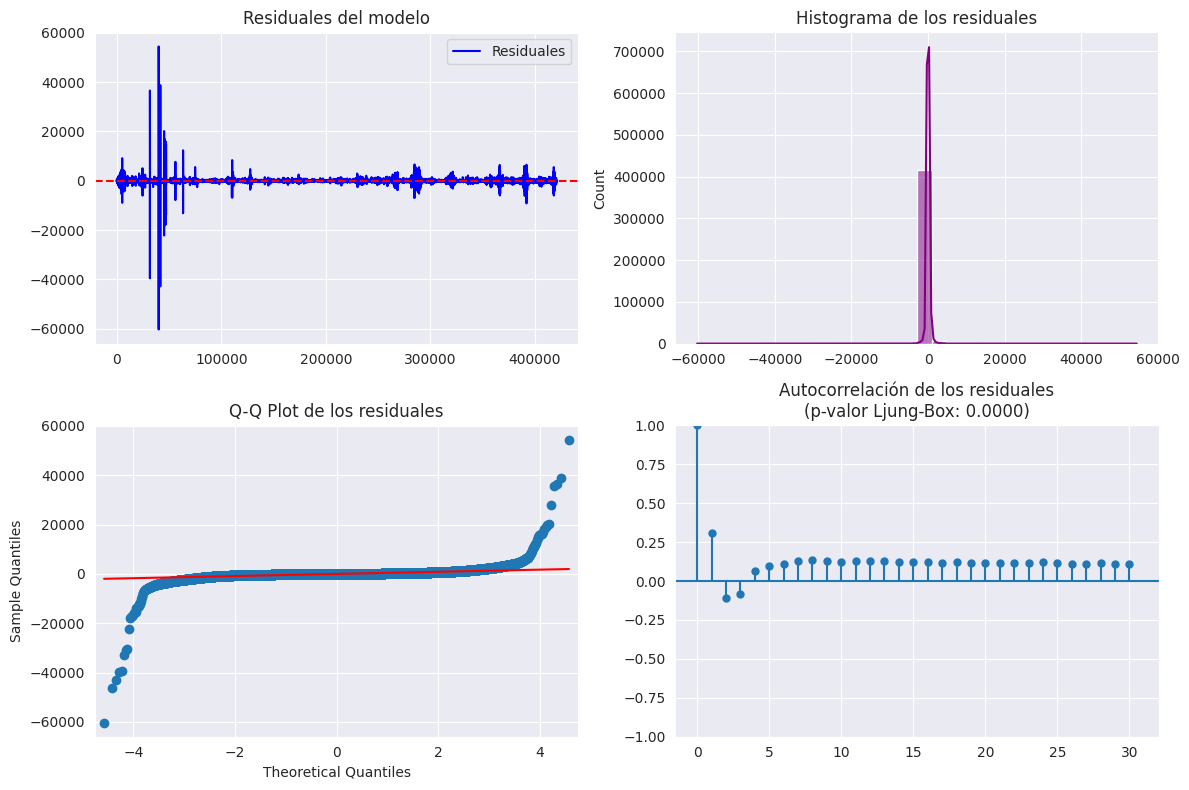

<Figure size 640x480 with 0 Axes>

In [9]:
# Calcular los residuos
residuos_es = train_data.to_numpy() - train_smooth.to_numpy().flatten()

# Calcular p-valor de la prueba de Ljung-Box
ljung_box_test = acorr_ljungbox(residuos_es, lags=[10], return_df=True)
p_valor = ljung_box_test['lb_pvalue'].values[0]

# Crear la figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Residuales (arriba izquierda)
axes[0, 0].plot(residuos_es, label="Residuales", color='blue')
axes[0, 0].axhline(0, linestyle="dashed", color="red")
axes[0, 0].set_title("Residuales del modelo")
axes[0, 0].legend()

# Histograma de residuales (arriba derecha)
sns.histplot(residuos_es, bins=30, kde=True, ax=axes[0, 1], color="purple")
axes[0, 1].set_title("Histograma de los residuales")

# Q-Q Plot (abajo izquierda)
sm.qqplot(residuos_es, line='s', ax=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot de los residuales")

# ACF (abajo derecha)
plot_acf(residuos_es, lags=30, ax=axes[1, 1])
axes[1, 1].set_title(f"Autocorrelación de los residuales\n(p-valor Ljung-Box: {p_valor:.4f})")

# Ajustar espacio entre gráficos
plt.tight_layout()
plt.show()

# Guardar las figuras secuenciales en Google Drive
plt.savefig('/content/drive/My Drive/Modelado_Misisipi/Figura 1. (ES1_Residuos_Entrenamiento).png')
plt.show()



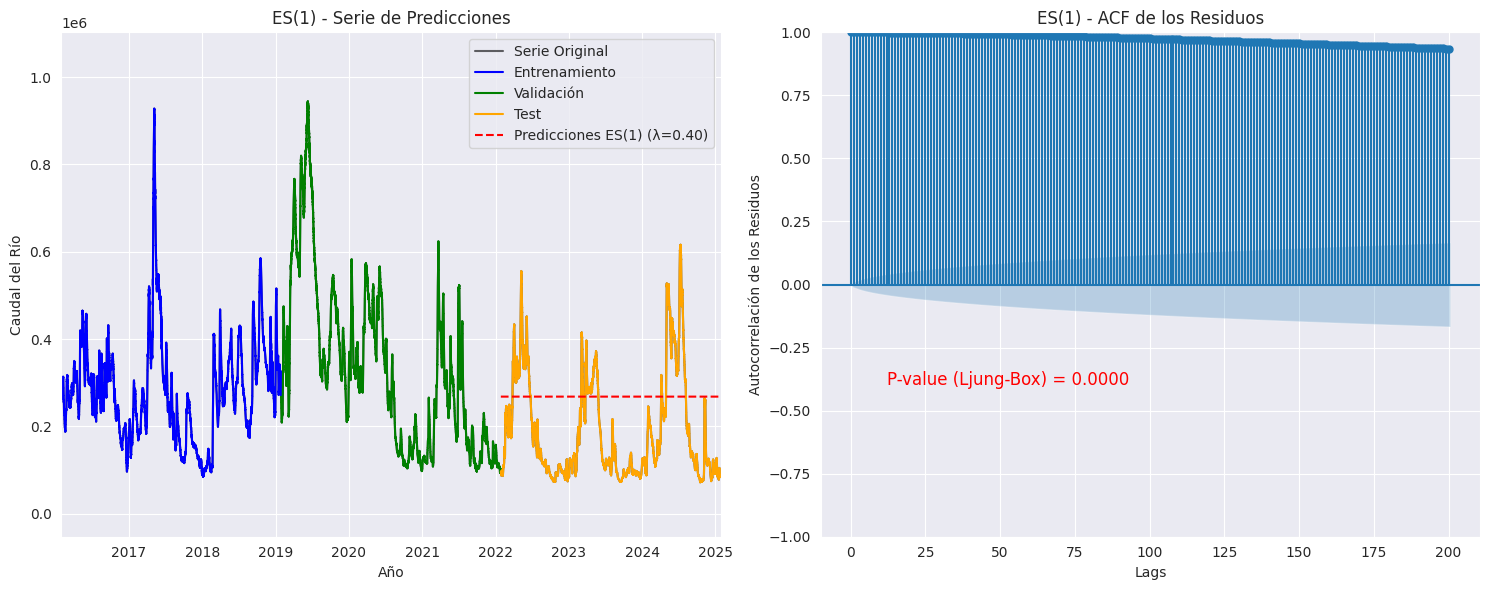

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error

best_lambda = 0.4  # Definir el valor de lambda antes de usarlo

#  FIGURA 2: Serie de predicciones y ACF de los residuos
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#  Primera gráfica: Serie temporal con entrenamiento, validación, test y predicciones
axs[0].plot(df.index, df['Caudal'], label="Serie Original", color="black", alpha=0.6)
axs[0].plot(train_data.index, train_data, label='Entrenamiento', color='blue')
axs[0].plot(valid_data.index, valid_data, label='Validación', color='green')
axs[0].plot(test_data.index, test_data, label='Test', color='orange')
axs[0].plot(test_data.index, predictions, label=f'Predicciones ES(1) (λ={best_lambda:.2f})', color='red', linestyle='--')

#  Zoom en el 30% final de los datos
zoom_fraction = 0.3
start_index = int(len(df) * (1 - zoom_fraction))
axs[0].set_xlim(df.index[start_index], df.index[-1])

#  Configuración de la primera gráfica
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Caudal del Río')
axs[0].set_title('ES(1) - Serie de Predicciones')
axs[0].legend(loc='best')

#  Segunda gráfica: ACF de los residuos
plot_acf(residuals, lags=200, alpha=0.05, ax=axs[1])

#  Prueba de Ljung-Box para autocorrelación en los residuos
ljung_box_test = acorr_ljungbox(residuals.dropna(), lags=[10], return_df=True)
p_value_ljung_box = ljung_box_test['lb_pvalue'].iloc[-1]

#  Agregar el p-value de la prueba de Ljung-Box en la parte inferior derecha
axs[1].text(0.1, 0.3, f'P-value (Ljung-Box) = {p_value_ljung_box:.4f}',
            transform=axs[1].transAxes, fontsize=12, color='red')

#  Configuración de la segunda gráfica
axs[1].set_title("ES(1) - ACF de los Residuos")
axs[1].set_xlabel("Lags")
axs[1].set_ylabel("Autocorrelación de los Residuos")

#  Ajustar el diseño
plt.tight_layout()

#  Guardar la gráfica como Figura 2
plt.savefig('/content/drive/My Drive/Modelado_Misisipi/Figura 2. (ES1_Serie_Predicciones_y_ACF_Residuos).png')

#  Mostrar la gráfica
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox

#  Función para calcular métricas de precisión del modelo ES(1)
def measacc_fs(y_real, y_pred, lambda_):
    T = len(y_real)  # Número total de datos

    # Convertimos `y_real` en un array para cálculos vectorizados
    yh = y_real.copy().values
    out = pd.concat([pd.Series([y_real.iloc[0]]), y_pred.iloc[:-1]], ignore_index=True).values
    prederr = yh - out  # Errores de predicción

    #  Cálculo de métricas
    MAPE = 100 * np.mean(np.abs(prederr / yh))  # Mean Absolute Percentage Error
    MAE = mean_absolute_error(y_real, y_pred)  # Mean Absolute Error
    MSE = mean_squared_error(y_real, y_pred)  # Mean Squared Error
    RMSE = np.sqrt(MSE)  # Root Mean Squared Error

    #  Prueba de Ljung-Box para verificar autocorrelación en residuos
    ljung_box_test = acorr_ljungbox(y_real - y_pred, lags=[10], return_df=True)
    p_value_lb = ljung_box_test['lb_pvalue'].iloc[0]  # P-value del test

    #  Crear DataFrame con métricas
    metricas_df = pd.DataFrame({
        "MAPE": [MAPE],
        "MAE": [MAE],
        "RMSE": [RMSE],
        "MSE": [MSE],
        "P-value Ljung-Box": [p_value_lb]
    })

    return metricas_df

#  Calcular métricas para el modelo ES(1)
metricas_residuos = measacc_fs(test_data, predictions, best_lambda)

#  Mostrar las métricas en un DataFrame
print("Métricas del Modelo ES(1):")
print(metricas_residuos)


Métricas del Modelo ES(1):
         MAPE            MAE           RMSE           MSE  P-value Ljung-Box
0  104.856187  130174.083612  142793.495393  2.038998e+10                0.0


In [ ]:
# 2.2. SUAVIZACIÓN EXPONENCIAL DE ORDEN 2 (ES(2))

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Cargar los datos desde Google Drive (asumiendo que el archivo está en el mismo directorio)
df = pd.read_csv('/content/drive/My Drive/Modelado_Misisipi/Datos_Caudal_Mssp.csv')

# Convertir la columna 'datetime' a formato de fecha si no se ha hecho antes
if 'datetime' in df.columns:
    df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H:%M')
    df.set_index('datetime', inplace=True)

# Verificar que la columna 'Caudal' esté presente
if 'Caudal' in df.columns:
    print("La columna 'Caudal' está cargada correctamente.")
else:
    print("Error: La columna 'Caudal' no está en los datos.")

# Dividir los datos en entrenamiento, validación y test (80%, 10%, 10%)
train_size = int(len(df) * 0.8)
valid_size = int(len(df) * 0.1)
test_size = len(df) - train_size - valid_size  # Garantizar que no falten datos

train_data = df.iloc[:train_size]
valid_data = df.iloc[train_size:train_size + valid_size]
test_data = df.iloc[train_size + valid_size:]

# Escalar los datos
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train_data[['Caudal']])
valid_scaled = scaler.transform(valid_data[['Caudal']])
test_scaled = scaler.transform(test_data[['Caudal']])

# Convertir a DataFrame con el índice original
train_scaled_df = pd.DataFrame(train_scaled, columns=['Caudal'], index=train_data.index)
valid_scaled_df = pd.DataFrame(valid_scaled, columns=['Caudal'], index=valid_data.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=['Caudal'], index=test_data.index)

# Verificar los primeros valores del conjunto de test para asegurarnos que está todo correcto
print(test_scaled_df.head())

# Ahora que los datos están cargados correctamente, podemos proceder con el modelo ES(2)
lambda_ = 0.7

# Predicciones con ES(2)
predictions_test_scaled = es2_forecast(test_scaled_df['Caudal'], lambda_, tau=len(test_scaled_df))  # Predicciones en test

# Desescalar las predicciones
predictions_test = scaler.inverse_transform(predictions_test_scaled.values.reshape(-1, 1))

# Asegurarse de que las predicciones tengan el mismo índice que test_data
predictions_test = pd.Series(predictions_test.flatten(), index=test_data.index)

# Calcular los residuos
residuos_test = test_data['Caudal'] - predictions_test  # Residuos del test

# Verificar si hay NaN en los residuos
print(f"¿Hay NaN en los residuos de test?: {residuos_test.isna().sum()}")

# Imprimir las primeras filas de residuos
print(f"Primeros valores de residuos_test: {residuos_test.head()}")



La columna 'Caudal' está cargada correctamente.
                       Caudal
datetime                     
2022-01-27 13:00:00 -1.016518
2022-01-27 13:30:00 -1.019223
2022-01-27 14:00:00 -1.019899
2022-01-27 14:30:00 -1.021251
2022-01-27 15:00:00 -1.021928
¿Hay NaN en los residuos de test?: 0
Primeros valores de residuos_test: datetime
2022-01-27 13:00:00    9480.905690
2022-01-27 13:30:00    9080.766755
2022-01-27 14:00:00    8980.844705
2022-01-27 14:30:00    8780.853503
2022-01-27 15:00:00    8680.938923
dtype: float64


¿Hay NaN en los residuos de entrenamiento?: 0
Primeros valores de residuos_train: datetime
1995-02-03 14:00:00   -56548.804837
1995-02-03 14:30:00   -56802.335206
1995-02-03 15:00:00   -57042.105772
1995-02-03 15:30:00   -56792.438208
1995-02-03 16:00:00   -56557.707112
dtype: float64
¿Hay NaN en los residuos de entrenamiento?: 0
Primeros valores de residuos_train: datetime
1995-02-03 14:00:00   -56548.804837
1995-02-03 14:30:00   -56802.335206
1995-02-03 15:00:00   -57042.105772
1995-02-03 15:30:00   -56792.438208
1995-02-03 16:00:00   -56557.707112
dtype: float64


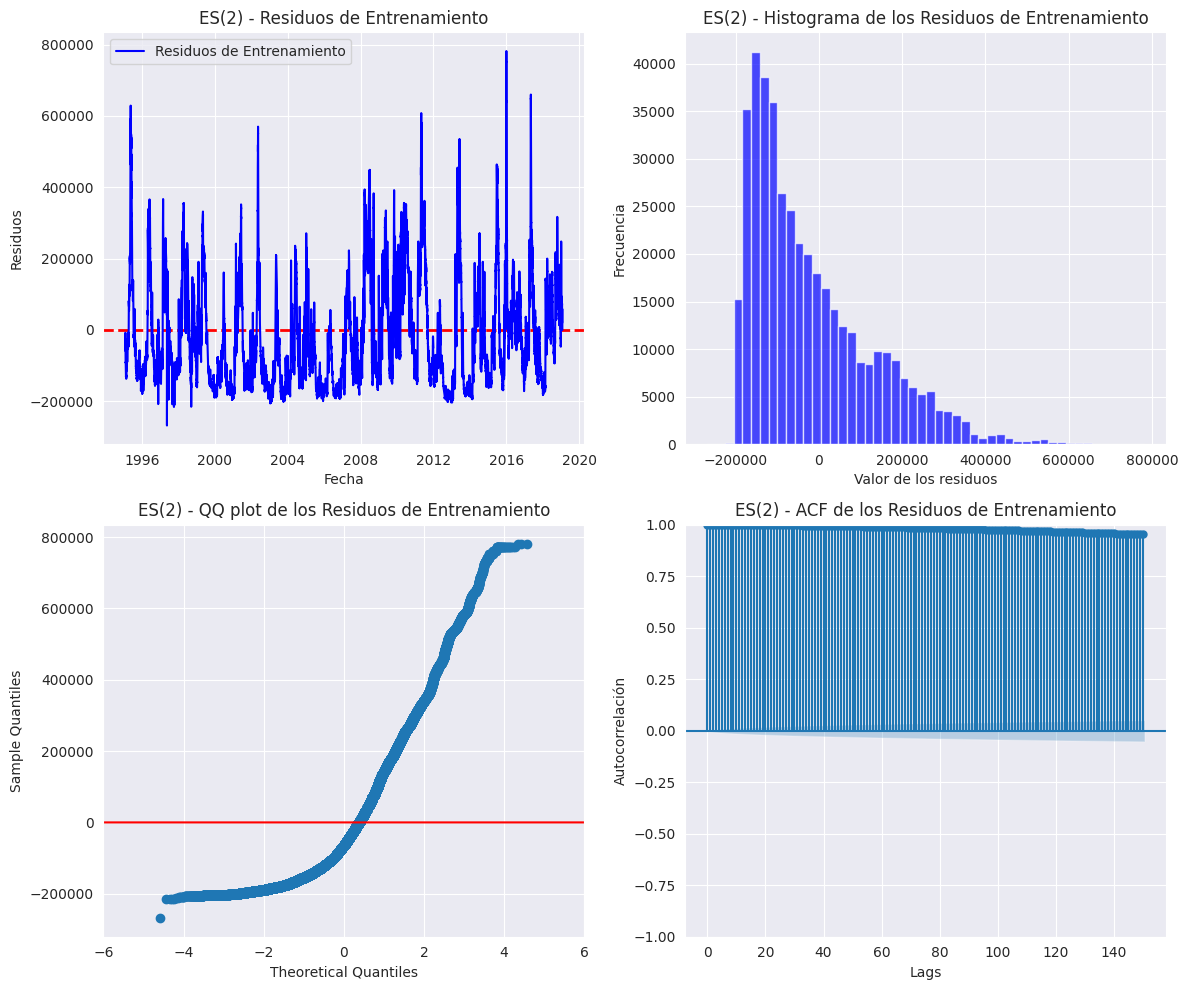

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import scipy.stats as stats

# Aplicar el modelo ES(2) en el conjunto de entrenamiento
predictions_train_scaled = es2_forecast(train_scaled_df['Caudal'], lambda_, tau=len(train_scaled_df))  # Predicciones en entrenamiento

# Desescalar las predicciones de entrenamiento
predictions_train = scaler.inverse_transform(predictions_train_scaled.values.reshape(-1, 1))

# Asegurarse de que las predicciones tengan el mismo índice que train_data
predictions_train = pd.Series(predictions_train.flatten(), index=train_data.index)

# Calcular los residuos de entrenamiento
residuos_train = train_data['Caudal'] - predictions_train  # Residuos del entrenamiento

# Verificar si hay NaN en los residuos del entrenamiento
print(f"¿Hay NaN en los residuos de entrenamiento?: {residuos_train.isna().sum()}")

# Imprimir las primeras filas de residuos de entrenamiento
print(f"Primeros valores de residuos_train: {residuos_train.head()}")


# Calcular los residuos de entrenamiento
residuos_train = train_data['Caudal'] - predictions_train  # Residuos del entrenamiento

# Verificar si hay NaN en los residuos del entrenamiento
print(f"¿Hay NaN en los residuos de entrenamiento?: {residuos_train.isna().sum()}")

# Imprimir las primeras filas de residuos de entrenamiento
print(f"Primeros valores de residuos_train: {residuos_train.head()}")

# Crear la figura con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Cuadrante 1: Gráfica de los residuos del entrenamiento (ES(2))
axs[0, 0].axhline(0, color='red', linestyle='--', linewidth=2)
axs[0, 0].plot(train_data.index, residuos_train, label='Residuos de Entrenamiento', color='blue')
axs[0, 0].set_title('ES(2) - Residuos de Entrenamiento')
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].set_ylabel('Residuos')
axs[0, 0].legend()

# Cuadrante 2: Histograma de los residuos del entrenamiento (ES(2))
axs[0, 1].hist(residuos_train, bins=50, color='blue', alpha=0.7)
axs[0, 1].set_title('ES(2) - Histograma de los Residuos de Entrenamiento')
axs[0, 1].set_xlabel('Valor de los residuos')
axs[0, 1].set_ylabel('Frecuencia')

# Cuadrante 3: QQ plot de los residuos del entrenamiento (ES(2))
sm.qqplot(residuos_train, line ='45', ax=axs[1, 0])
axs[1, 0].set_title('ES(2) - QQ plot de los Residuos de Entrenamiento')
axs[1, 0].set_xlim(-6, 6)

# Cuadrante 4: ACF de los residuos del entrenamiento (ES(2))
plot_acf(residuos_train, lags=150, alpha=0.05, ax=axs[1, 1])
axs[1, 1].set_title('ES(2) - ACF de los Residuos de Entrenamiento')
axs[1, 1].set_xlabel('Lags')
axs[1, 1].set_ylabel('Autocorrelación')


plt.tight_layout()

# Guardar y Mostrar la figura
plt.savefig('/content/drive/My Drive/Modelado_Misisipi/Figura_3_ES(2)_Residuos_Entrenamiento.png')

# Ajustar el diseño
plt.show()

Primeros valores de test_data:
                      Caudal
datetime                    
2022-01-27 13:00:00  97600.0
2022-01-27 13:30:00  97200.0
2022-01-27 14:00:00  97100.0
2022-01-27 14:30:00  96900.0
2022-01-27 15:00:00  96800.0
Primeros valores de residuos_test:
datetime
2022-01-27 13:00:00   -170708.636401
2022-01-27 13:30:00   -171108.636401
2022-01-27 14:00:00   -171208.636401
2022-01-27 14:30:00   -171408.636401
2022-01-27 15:00:00   -171508.636401
dtype: float64


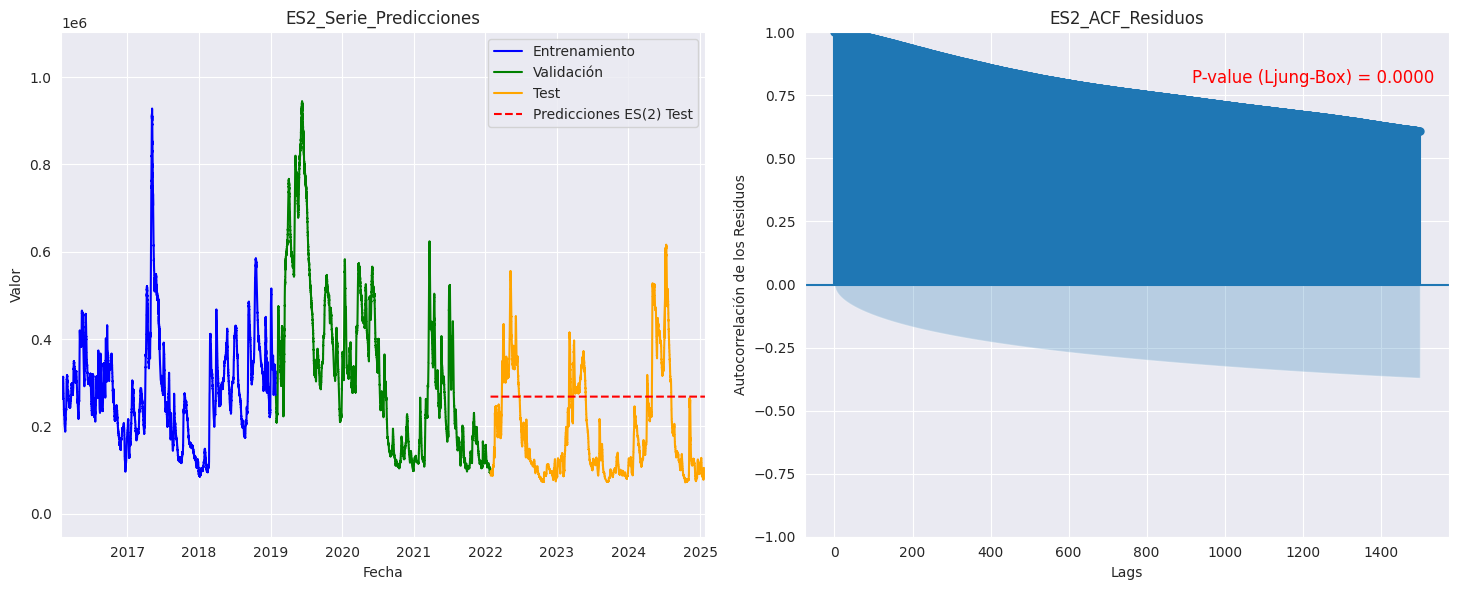

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.dates as mdates

# Dividir los datos en tres conjuntos: entrenamiento (80%), validación (10%), y test (10%)
train_size = int(len(df) * 0.8)
valid_size = int(len(df) * 0.1)
test_size = len(df) - train_size - valid_size  # Garantizar que no falten datos

train_data = df.iloc[:train_size]
valid_data = df.iloc[train_size:train_size + valid_size]
test_data = df.iloc[train_size + valid_size:]

# Asegurémonos de que las predicciones tengan el mismo índice que test_data
predictions = pd.Series(predictions, index=test_data.index)

# Calcular los residuos
residuos_test = test_data['Caudal'] - predictions  # Asegúrate de que 'Caudal' es la columna de interés

# Verificar las primeras filas de los datos
print(f"Primeros valores de test_data:\n{test_data.head()}")
print(f"Primeros valores de residuos_test:\n{residuos_test.head()}")

# Crear la figura con 1 fila y 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Serie temporal con entrenamiento, validación, test y predicciones
axs[0].plot(train_data.index, train_data['Caudal'], label='Entrenamiento', color='blue')
axs[0].plot(valid_data.index, valid_data['Caudal'], label='Validación', color='green')
axs[0].plot(test_data.index, test_data['Caudal'], label='Test', color='orange')
axs[0].plot(test_data.index, predictions, label=f'Predicciones ES(2) Test', color='red', linestyle='--')

# Zoom en el 30% final de los datos
zoom_fraction = 0.3
start_index = int(len(df) * (1 - zoom_fraction))
axs[0].set_xlim(df.index[start_index], df.index[-1])

# Ajustar el formato de fecha para mostrar solo el año en el eje X
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Solo mostrar el año

# Configuración del gráfico
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Valor')
axs[0].set_title('ES2_Serie_Predicciones')
axs[0].legend(loc='best')

# Segunda gráfica: ACF de los residuos
plot_acf(residuos_test, lags=1500, alpha=0.05, ax=axs[1])  # Lags ajustados a 1500

# Prueba de Ljung-Box para autocorrelación en los residuos
ljung_box_test = acorr_ljungbox(residuos_test.dropna(), lags=[10], return_df=True)
p_value_ljung_box = ljung_box_test['lb_pvalue'].iloc[-1]

# Agregar el p-value de la prueba de Ljung-Box en la gráfica de la ACF
axs[1].text(0.6, 0.9, f'P-value (Ljung-Box) = {p_value_ljung_box:.4f}',
            transform=axs[1].transAxes, fontsize=12, color='red')

# Configuración de la segunda gráfica (ACF de los residuos)
axs[1].set_title("ES2_ACF_Residuos")
axs[1].set_xlabel("Lags")
axs[1].set_ylabel("Autocorrelación de los Residuos")

# Ajustar el diseño
plt.tight_layout()

# Guardar la figura en el Google Drive
fig.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_4_ES(2)_Residuos_Entrenamiento.png')

# Mostrar la gráfica
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox

# Función para calcular métricas de precisión del modelo ES(2)
def measacc_fs_es2(y_real, y_pred, lambda_):
    T = len(y_real)  # Número total de datos

    # Convertimos `y_real` en un array para cálculos vectorizados
    yh = y_real.copy().values
    # Aseguramos que y_pred y y_real tengan el mismo índice
    y_pred_aligned = y_pred.reindex(y_real.index)  # Reindexar predicciones según el índice de y_real

    # Concatenamos el primer valor de y_real con y_pred alineado
    out = pd.concat([pd.Series([y_real.iloc[0]], index=[y_real.index[0]]), y_pred_aligned.iloc[:-1]]).values
    prederr = yh - out  # Errores de predicción

    # Cálculo de métricas
    MAPE = 100 * np.mean(np.abs(prederr / yh))  # Mean Absolute Percentage Error
    MAE = mean_absolute_error(y_real, y_pred_aligned)  # Mean Absolute Error
    MSE = mean_squared_error(y_real, y_pred_aligned)  # Mean Squared Error
    RMSE = np.sqrt(MSE)  # Root Mean Squared Error

    # Prueba de Ljung-Box para verificar autocorrelación en residuos
    ljung_box_test = acorr_ljungbox(y_real - y_pred_aligned, lags=[10], return_df=True)
    p_value_lb = ljung_box_test['lb_pvalue'].iloc[0]  # P-value del test

    # Crear DataFrame con métricas
    metricas_df = pd.DataFrame({
        "MAPE": [MAPE],
        "MAE": [MAE],
        "RMSE": [RMSE],
        "MSE": [MSE],
        "P-value Ljung-Box": [p_value_lb]
    })

    return metricas_df

# Definir el mejor valor de lambda
best_lambda = 0.7  # Asigna el valor de lambda que consideres adecuado

# Asegúrate de que 'test_data' y 'predictions' estén bien definidos antes de pasar a esta función
metricas_residuos_es2 = measacc_fs_es2(test_data['Caudal'], predictions, best_lambda)

# Mostrar las métricas en un DataFrame
print("Métricas del Modelo ES(2):")
print(metricas_residuos_es2)


Métricas del Modelo ES(2):
         MAPE            MAE           RMSE           MSE  P-value Ljung-Box
0  104.856187  130174.083612  142793.495393  2.038998e+10                0.0


In [ ]:
# 2.3. SUAVIZACIÓN EXPONENCIAL DE ORDEN 1 - HOLT-WINTERS (ES-HW(1))

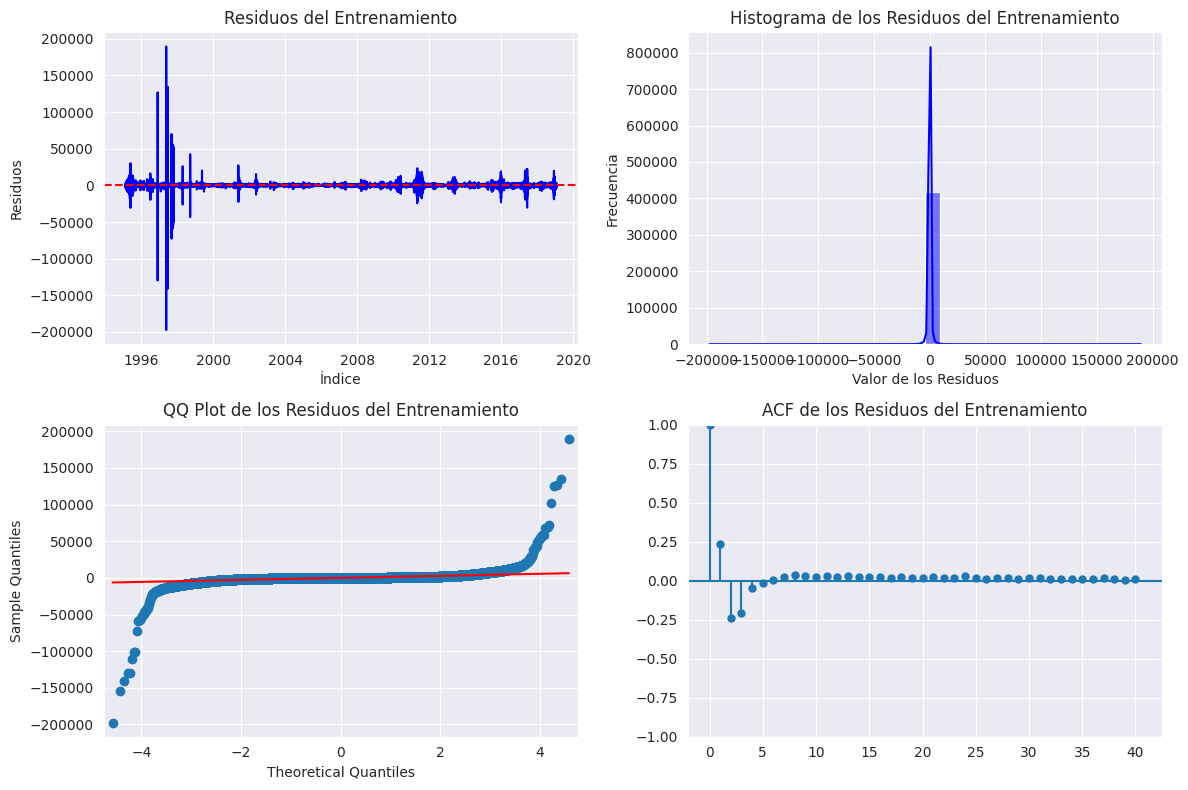

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from math import sqrt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# Dividir los datos en entrenamiento, validación y test
train_size = int(0.8 * len(df))
valid_size = int(0.1 * len(df))

train_data = df.iloc[:train_size]
valid_data = df.iloc[train_size:train_size+valid_size]
test_data = df.iloc[train_size+valid_size:]

# Función para ajustar el modelo Holt-Winters de orden 1 (ES-HW(1))
def measacc_hw(y, lambda_):
    model = ExponentialSmoothing(y.values, trend='add', seasonal=None, damped_trend=False)
    fit = model.fit(smoothing_level=lambda_)

    # Predicciones ajustadas
    y_pred = pd.Series(data=fit.fittedvalues, index=y.index)

    # Residuos (errores de predicción)
    prederr = y.values - y_pred.values

    return prederr, y_pred

# Ajustar el modelo ES-HW(1) con los datos de entrenamiento
lambda_ = 0.7  # Ajusta el valor de lambda según sea necesario
prederr, y_pred = measacc_hw(train_data['Caudal'], lambda_)

# Convertir los residuos en una Serie de Pandas para poder usar dropna()
prederr_series = pd.Series(prederr, index=train_data.index)

# Crear la figura 5 con 2 filas y 2 columnas
fig1, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Gráfica 1: Residuos del Entrenamiento (Fila 1, Columna 1)
axs[0, 0].plot(prederr_series, color='blue')  # Usamos los residuos convertidos en pandas Series
axs[0, 0].axhline(0, linestyle='--', color='red')  # Línea en y=0 para referencia
axs[0, 0].set_title("Residuos del Entrenamiento")
axs[0, 0].set_xlabel('Índice')
axs[0, 0].set_ylabel('Residuos')

# 2. Gráfica 2: Histograma de los residuos (Fila 1, Columna 2)
sns.histplot(prederr_series, bins=30, kde=True, ax=axs[0, 1], color='blue')
axs[0, 1].set_title("Histograma de los Residuos del Entrenamiento")
axs[0, 1].set_xlabel('Valor de los Residuos')
axs[0, 1].set_ylabel('Frecuencia')

# 3. Gráfica 3: QQ Plot (Fila 2, Columna 1)
sm.qqplot(prederr_series, line='s', ax=axs[1, 0])
axs[1, 0].set_title("QQ Plot de los Residuos del Entrenamiento")

# 4. Gráfica 4: ACF de los residuos (Fila 2, Columna 2)
plot_acf(prederr_series.dropna(), lags=40, alpha=0.05, ax=axs[1, 1])  # Ahora funciona correctamente sin NaN
axs[1, 1].set_title("ACF de los Residuos del Entrenamiento")

# Ajustar el diseño
plt.tight_layout()

# Guardar la figura
fig.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura 5. ES_HW_Residuos_Entrenamiento.png')

# Mostrar la figura
plt.show()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.dates as mdates

# Dividir los datos en entrenamiento, validación y test
train_size = int(0.8 * len(df))
valid_size = int(0.1 * len(df))

train_data = df.iloc[:train_size]
valid_data = df.iloc[train_size:train_size + valid_size]
test_data = df.iloc[train_size + valid_size:]

# Función para ajustar el modelo Holt-Winters de orden 1 (ES-HW(1)) y hacer predicciones
def measacc_hw(y, lambda_):
    model = ExponentialSmoothing(y.values, trend='add', seasonal=None, damped_trend=False)
    fit = model.fit(smoothing_level=lambda_)

    # Predicciones ajustadas
    y_pred = pd.Series(data=fit.fittedvalues, index=y.index)

    # Predicciones para el test
    y_test_pred = fit.forecast(len(test_data))

    # Residuos (errores de predicción)
    prederr = y.values - y_pred.values

    return y_pred, y_test_pred, prederr

# Ajustar el modelo Holt-Winters y hacer predicciones
lambda_ = 0.7  # Ajuste de lambda según sea necesario
predictions_train_series, predictions_test_series, residuos_test = measacc_hw(train_data['Caudal'], lambda_)

# Verificación de las predicciones
print("\n Primeras predicciones de entrenamiento:")
print(predictions_train_series.head())

print("\n Primeras predicciones de test:")
print(predictions_test_series[:5])  # Imprimir las primeras 5 predicciones del test






 Primeras predicciones de entrenamiento:
datetime
1995-02-03 14:00:00    211190.909091
1995-02-03 14:30:00    211504.471459
1995-02-03 15:00:00    211418.361971
1995-02-03 15:30:00    211209.015945
1995-02-03 16:00:00    211322.046115
dtype: float64

 Primeras predicciones de test:
[267711.81086146 267292.39615246 266872.98144346 266453.56673446
 266034.15202546]



 Primeras predicciones de entrenamiento:
datetime
1995-02-03 14:00:00    211190.909091
1995-02-03 14:30:00    211504.471459
1995-02-03 15:00:00    211418.361971
1995-02-03 15:30:00    211209.015945
1995-02-03 16:00:00    211322.046115
dtype: float64

 Primeras predicciones de test:
[267711.81086146 267292.39615246 266872.98144346 266453.56673446
 266034.15202546]


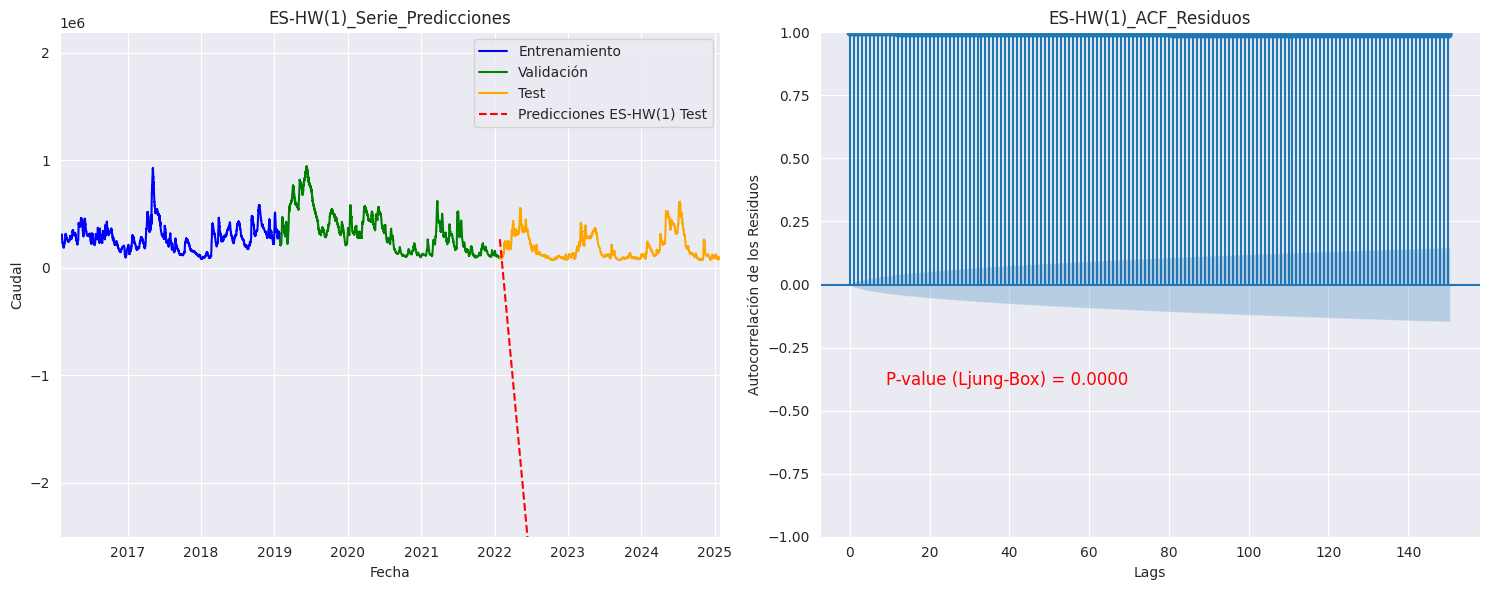

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.dates as mdates

# Dividir los datos en entrenamiento, validación y test
train_size = int(0.8 * len(df))
valid_size = int(0.1 * len(df))

train_data = df.iloc[:train_size]
valid_data = df.iloc[train_size:train_size + valid_size]
test_data = df.iloc[train_size + valid_size:]

# Función para ajustar el modelo Holt-Winters de orden 1 (ES-HW(1)) y hacer predicciones
def measacc_hw(y, lambda_):
    model = ExponentialSmoothing(y.values, trend='add', seasonal=None, damped_trend=False)
    fit = model.fit(smoothing_level=lambda_)

    # Predicciones ajustadas
    y_pred = pd.Series(data=fit.fittedvalues, index=y.index)

    # Predicciones para el test
    y_test_pred = fit.forecast(len(test_data))

    # Residuos (errores de predicción) para el test
    residuos_test = test_data['Caudal'] - y_test_pred  # Solo para el conjunto de test

    return y_pred, y_test_pred, residuos_test

# Ajustar el modelo Holt-Winters y hacer predicciones
lambda_ = 0.7  # Ajuste de lambda según sea necesario
predictions_train_series, predictions_test_series, residuos_test = measacc_hw(train_data['Caudal'], lambda_)

# Verificación de las predicciones
print("\n Primeras predicciones de entrenamiento:")
print(predictions_train_series.head())

print("\n Primeras predicciones de test:")
print(predictions_test_series[:5])  # Imprimir las primeras 5 predicciones del test

# Convertir los residuos a una Pandas Series
residuos_test_series = pd.Series(residuos_test, index=test_data.index)

# Crear la figura con 1 fila y 2 columnas (Figura 6)
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Serie temporal con entrenamiento, validación, test y predicciones
axs[0].plot(train_data.index, train_data['Caudal'], label='Entrenamiento', color='blue')
axs[0].plot(valid_data.index, valid_data['Caudal'], label='Validación', color='green')
axs[0].plot(test_data.index, test_data['Caudal'], label='Test', color='orange')
axs[0].plot(test_data.index, predictions_test_series, label=f'Predicciones ES-HW(1) Test', color='red', linestyle='--')

# Zoom en el 30% final de los datos
zoom_fraction = 0.3
start_index = int(len(df) * (1 - zoom_fraction))
axs[0].set_xlim(df.index[start_index], df.index[-1])

# Ajustar el formato de fecha para mostrar solo el año en el eje X
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Solo mostrar el año

# Configuración del gráfico
axs[0].set_ylim(-0.25e7, axs[0].get_ylim()[1])
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Caudal')
axs[0].set_title('ES-HW(1)_Serie_Predicciones')
axs[0].legend(loc='best')

# Segunda gráfica: ACF de los residuos
plot_acf(residuos_test_series.dropna(), lags=150, alpha=0.05, ax=axs[1])  # Lags ajustados a 40

# Prueba de Ljung-Box para autocorrelación en los residuos
ljung_box_test = acorr_ljungbox(residuos_test_series.dropna(), lags=[10], return_df=True)
p_value_ljung_box = ljung_box_test['lb_pvalue'].iloc[-1]

# Agregar el p-value de la prueba de Ljung-Box en la gráfica de la ACF
axs[1].text(0.1, 0.3, f'P-value (Ljung-Box) = {p_value_ljung_box:.4f}',
            transform=axs[1].transAxes, fontsize=12, color='red')

# Configuración de la segunda gráfica (ACF de los residuos)
axs[1].set_title("ES-HW(1)_ACF_Residuos")
axs[1].set_xlabel("Lags")
axs[1].set_ylabel("Autocorrelación de los Residuos")

# Ajustar el diseño
plt.tight_layout()

# Guardar la figura
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_6_ES_HW(1)_Serie_Predicciones_y_ACF_Residuos.png')

# Mostrar la figura
plt.show()



In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.stats.diagnostic import acorr_ljungbox

# Función para calcular métricas del modelo ES-HW(1)
def compute_metrics_hw1(y_real, y_pred):
    # Convertir a pandas Series asegurando que los índices coincidan
    y_real = pd.Series(y_real, index=test_data.index)
    y_pred = pd.Series(y_pred, index=test_data.index)

    # Reemplazar valores NaN en las predicciones con interpolación (o con 0 si es necesario)
    y_pred.fillna(method='ffill', inplace=True)  # Forward fill para evitar NaNs
    y_pred.fillna(method='bfill', inplace=True)  # Backward fill si el primer valor es NaN

    # Verificar si aún hay NaNs y eliminarlos si es necesario
    valid_idx = ~(y_real.isna() | y_pred.isna())  # Índices válidos
    y_real, y_pred = y_real[valid_idx], y_pred[valid_idx]  # Filtrar NaNs

    # Calcular residuos
    residuals = y_real - y_pred

    # Cálculo de métricas
    MAPE = mean_absolute_percentage_error(y_real, y_pred) * 100  # En porcentaje
    MAE = mean_absolute_error(y_real, y_pred)
    MSE = mean_squared_error(y_real, y_pred)
    RMSE = sqrt(MSE)

    # Prueba de Ljung-Box para autocorrelación en residuos
    ljung_box_test = acorr_ljungbox(residuals.dropna(), lags=[10], return_df=True)
    p_value_lb = ljung_box_test['lb_pvalue'].iloc[0]  # P-value del test

    # Crear un DataFrame con las métricas
    metrics_df = pd.DataFrame({
        "MAPE (%)": [MAPE],
        "MAE": [MAE],
        "RMSE": [RMSE],
        "MSE": [MSE],
        "P-value Ljung-Box": [p_value_lb]
    })

    return metrics_df, residuals

# Obtener las predicciones para el test set
predictions_hw1_test = predictions_test_series  # Ya calculadas previamente

# Calcular métricas
metrics_df_hw1, residuals_hw1 = compute_metrics_hw1(test_data['Caudal'], predictions_hw1_test)

# Mostrar las métricas en un DataFrame
print("Métricas del Modelo ES-HW(1):")
print(metrics_df_hw1)


Métricas del Modelo ES-HW(1):
      MAPE (%)           MAE          RMSE           MSE  P-value Ljung-Box
0  8087.322499  1.094611e+07  1.265726e+07  1.602063e+14                0.0


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.stats.diagnostic import acorr_ljungbox

# Función para calcular métricas del modelo ES-HW(1)
def compute_metrics_hw1(y_real, y_pred):
    # Convertir a pandas Series asegurando que los índices coincidan
    y_real = pd.Series(y_real, index=test_data.index)
    y_pred = pd.Series(y_pred, index=test_data.index)

    # Reemplazar valores NaN en las predicciones con interpolación (o con 0 si es necesario)
    y_pred.fillna(method='ffill', inplace=True)  # Forward fill para evitar NaNs
    y_pred.fillna(method='bfill', inplace=True)  # Backward fill si el primer valor es NaN

    # Verificar si aún hay NaNs y eliminarlos si es necesario
    valid_idx = ~(y_real.isna() | y_pred.isna())  # Índices válidos
    y_real, y_pred = y_real[valid_idx], y_pred[valid_idx]  # Filtrar NaNs

    # Calcular residuos
    residuals = y_real - y_pred

    # Cálculo de métricas
    MAPE = mean_absolute_percentage_error(y_real, y_pred) * 100  # En porcentaje
    MAE = mean_absolute_error(y_real, y_pred)
    MSE = mean_squared_error(y_real, y_pred)
    RMSE = sqrt(MSE)

    # Prueba de Ljung-Box para autocorrelación en residuos
    ljung_box_test = acorr_ljungbox(residuals.dropna(), lags=[10], return_df=True)
    p_value_lb = ljung_box_test['lb_pvalue'].iloc[0]  # P-value del test

    # Crear un DataFrame con las métricas
    metrics_df = pd.DataFrame({
        "MAPE (%)": [MAPE],
        "MAE": [MAE],
        "RMSE": [RMSE],
        "MSE": [MSE],
        "P-value Ljung-Box": [p_value_lb]
    })

    return metrics_df, residuals

# Obtener las predicciones para el test set
predictions_hw1_test = predictions_test_series  # Ya calculadas previamente

# Calcular métricas
metrics_df_hw1, residuals_hw1 = compute_metrics_hw1(test_data['Caudal'], predictions_hw1_test)

# Mostrar las métricas en un DataFrame
print("Métricas del Modelo ES-HW(1):")
print(metrics_df_hw1)


Métricas del Modelo ES-HW(1):
      MAPE (%)           MAE          RMSE           MSE  P-value Ljung-Box
0  8087.322499  1.094611e+07  1.265726e+07  1.602063e+14                0.0


In [ ]:
# 2.4. SUAVIZACIÓN EXPONENCIAL HOLT-WINTERS DE ORDEN 2 (ES-HW(2))

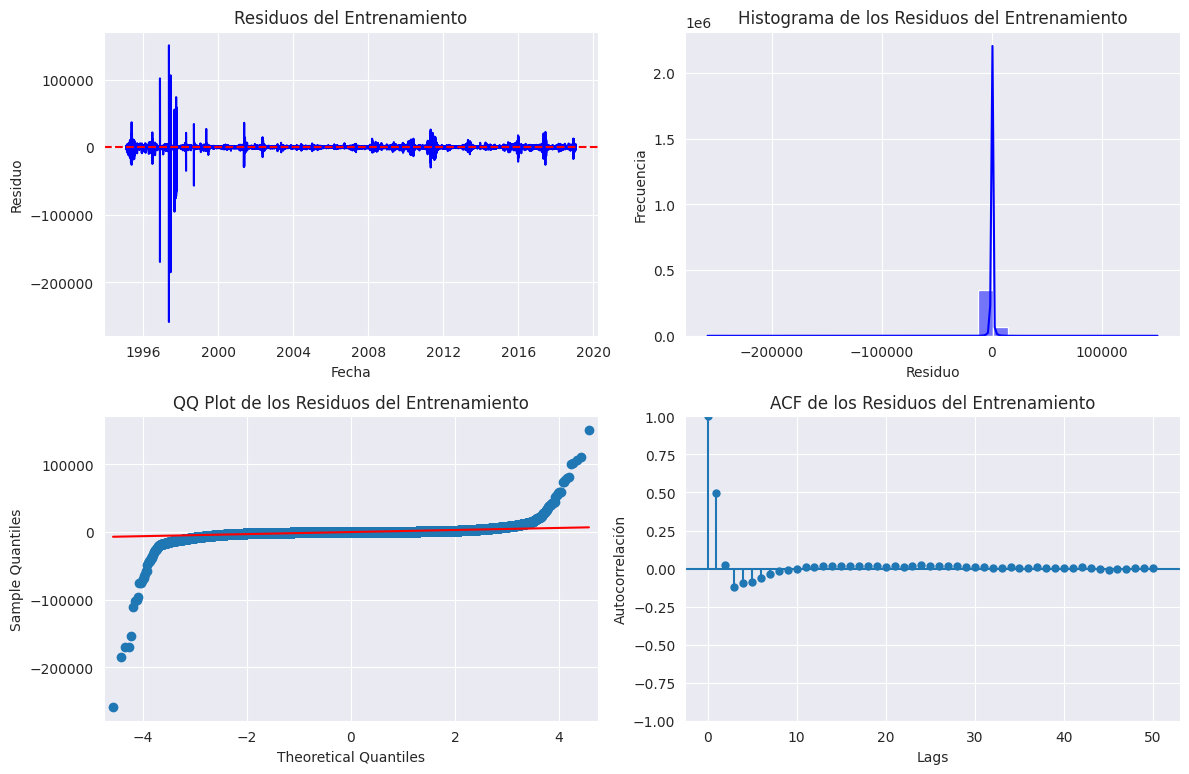

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

# **Función para el modelo ES-HW(2)**
def es_hw2_forecast(train, test, seasonal_periods=12, lambda_1=0.3, lambda_2=0.3):
    # Primer modelo Holt-Winters (ES-HW(1)) sobre los datos de entrenamiento
    model_hw1 = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=seasonal_periods)
    fit_hw1 = model_hw1.fit(smoothing_level=lambda_1)
    hw1_predictions = fit_hw1.fittedvalues  # Predicciones de entrenamiento (ajustadas)

    # Segundo modelo Holt-Winters (ES-HW(2)) sobre las predicciones del primer modelo
    model_hw2 = ExponentialSmoothing(hw1_predictions, trend='add', seasonal='add', seasonal_periods=seasonal_periods)
    fit_hw2 = model_hw2.fit(smoothing_level=lambda_2)
    hw2_predictions = fit_hw2.forecast(len(test))  # Predicciones para el conjunto de test

    return hw1_predictions, hw2_predictions, fit_hw1, fit_hw2

# **Ajuste del modelo ES-HW(2)**
hw1_predictions, hw2_predictions, fit_hw1, fit_hw2 = es_hw2_forecast(train_data['Caudal'], test_data['Caudal'])

# **Calcular los residuos de entrenamiento**
residuals_hw = train_data['Caudal'] - hw1_predictions  # Los residuos del primer modelo

# Figura 8
# Crear la figura con 2 filas y 2 columnas
fig1, axs = plt.subplots(2, 2, figsize=(12, 8))

# **Gráfica 1: Residuos del entrenamiento (Fila 1, Columna 1)**
axs[0, 0].plot(train_data.index, residuals_hw, color='blue')
axs[0, 0].axhline(0, linestyle='--', color='red')
axs[0, 0].set_title("ES-HW(2) Residuos del Entrenamiento")
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].set_ylabel('Residuo')

# **Gráfica 2: Histograma de los residuos (Fila 1, Columna 2)**
sns.histplot(residuals_hw, bins=30, kde=True, ax=axs[0, 1], color='blue')
axs[0, 1].set_title("ES-HW(2) Histograma de los Residuos del Entrenamiento")
axs[0, 1].set_xlabel('Residuo')
axs[0, 1].set_ylabel('Frecuencia')

# **Gráfica 3: QQ plot (Fila 2, Columna 1)**
sm.qqplot(residuals_hw, line='s', ax=axs[1, 0])
axs[1, 0].set_title("ES-HW(2) QQ Plot de los Residuos del Entrenamiento")

# **Gráfica 4: ACF de los residuos (Fila 2, Columna 2)**
plot_acf(residuals_hw, lags=50, alpha=0.05, ax=axs[1, 1])
axs[1, 1].set_title("ES-HW(2) ACF de los Residuos del Entrenamiento")
axs[1, 1].set_xlabel("Lags")
axs[1, 1].set_ylabel("Autocorrelación")

# Ajustar el diseño para que no se sobrepongan
plt.tight_layout()

# Guardar y mostrar la figura
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura 7. ES-HW(2)_Residuos_Entrenamiento.png')
plt.show()


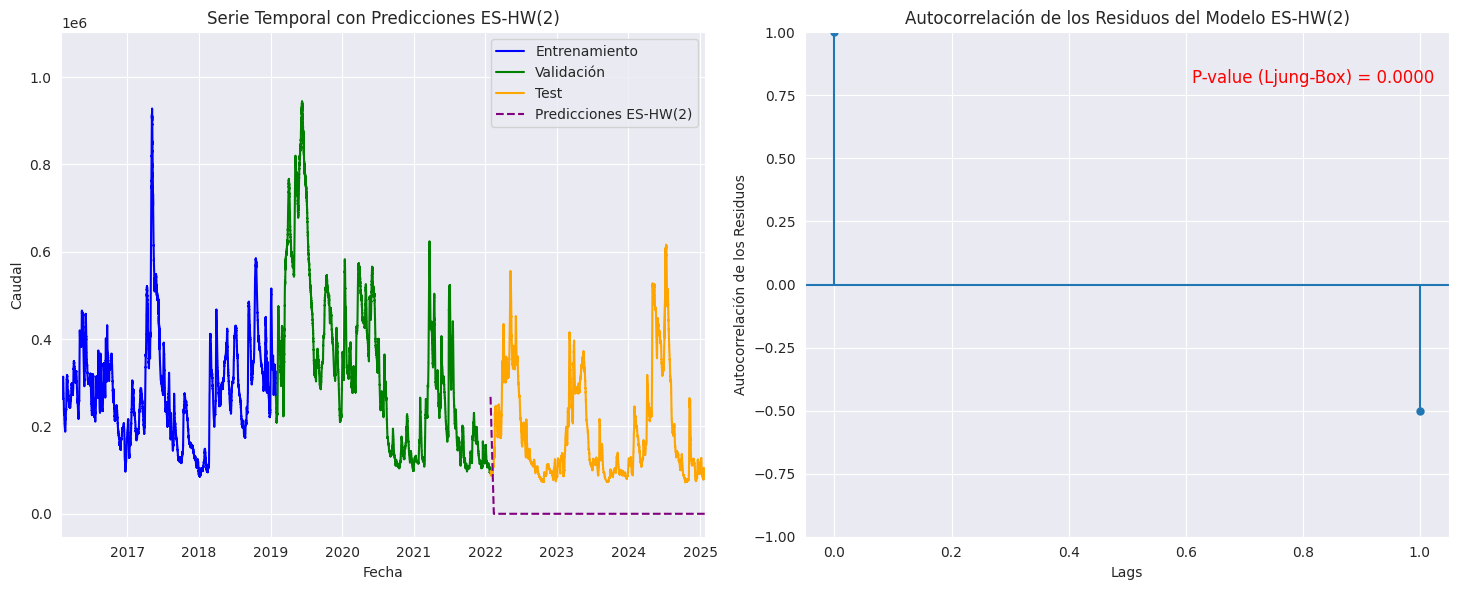

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# **Asegurarnos de que las predicciones no sean negativas**
hw2_predictions_corrected = np.maximum(hw2_predictions, 0)  # Reemplazar valores negativos por 0

# **Graficar la serie temporal con las predicciones del modelo ES-HW(2)**
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Graficar los datos reales de entrenamiento, validación, test
axs[0].plot(train_data.index, train_data['Caudal'], label='Entrenamiento', color='blue')
axs[0].plot(valid_data.index, valid_data['Caudal'], label='Validación', color='green')
axs[0].plot(test_data.index, test_data['Caudal'], label='Test', color='orange')

# Graficar las predicciones del modelo ES-HW(2)
axs[0].plot(test_data.index, hw2_predictions_corrected, label='Predicciones ES-HW(2)', color='purple', linestyle='--')

# Ajustar la visualización para el zoom en el 30% final
zoom_fraction = 0.3
start_index = int(len(df) * (1 - zoom_fraction))  # Calcular el índice de inicio del zoom
axs[0].set_xlim(df.index[start_index], df.index[-1])

# Añadir etiquetas y título
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Caudal')
axs[0].set_title('Serie Temporal con Predicciones ES-HW(2)')
axs[0].legend()

# **Graficar la ACF de los residuos**
residuals_hw2 = test_data['Caudal'] - hw2_predictions_corrected  # Calcular residuos

# Eliminar NaNs antes de graficar la ACF
residuals_hw2 = residuals_hw2.dropna()

# Verificar la longitud de los residuos antes de graficar
max_lags = min(150, len(residuals_hw2) - 1)  # Limitar los lags al tamaño de los residuos disponibles

# Graficar la ACF de los residuos si hay suficientes datos
plot_acf(residuals_hw2, lags=max_lags, alpha=0.05, ax=axs[1])

axs[1].set_title("Autocorrelación de los Residuos del Modelo ES-HW(2)")
axs[1].set_xlabel("Lags")
axs[1].set_ylabel("Autocorrelación de los Residuos")

# **Mostrar p-value de la prueba de Ljung-Box**
ljung_box_test = acorr_ljungbox(residuals_hw2, lags=[10], return_df=True)

# Verificar si el p-value existe y no es NaN antes de mostrarlo
if not ljung_box_test['lb_pvalue'].isna().any():
    p_value_ljung_box = ljung_box_test['lb_pvalue'].iloc[-1]  # P-value para el último lag
    axs[1].text(0.6, 0.9, f'P-value (Ljung-Box) = {p_value_ljung_box:.4f}',
             transform=axs[1].transAxes, fontsize=12, color='red')
else:
    axs[1].text(0.6, 0.9, 'P-value no disponible',
             transform=axs[1].transAxes, fontsize=12, color='red')

# Ajustar la disposición de los gráficos
plt.tight_layout()

# Guardar la figura en la ruta correcta
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura 8. ES-HW(2)_Serie_Predicciones_y_ACF_Residuos.png')

# Mostrar la figura
plt.show()



In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.stats.diagnostic import acorr_ljungbox

# Función para calcular las métricas del modelo ES-HW(2)
def compute_metrics_hw2(y_real, y_pred):
    # Convertir a pandas Series asegurando que los índices coincidan
    y_real = pd.Series(y_real, index=test_data.index)
    y_pred = pd.Series(y_pred, index=test_data.index)

    # Reemplazar valores NaN en las predicciones con interpolación (o con 0 si es necesario)
    y_pred.fillna(method='ffill', inplace=True)  # Forward fill para evitar NaNs
    y_pred.fillna(method='bfill', inplace=True)  # Backward fill si el primer valor es NaN

    # Verificar si aún hay NaNs y eliminarlos si es necesario
    valid_idx = ~(y_real.isna() | y_pred.isna())  # Índices válidos
    y_real, y_pred = y_real[valid_idx], y_pred[valid_idx]  # Filtrar NaNs

    # Calcular residuos
    residuals = y_real - y_pred

    # Cálculo de métricas
    MAPE = mean_absolute_percentage_error(y_real, y_pred) * 100  # En porcentaje
    MAE = mean_absolute_error(y_real, y_pred)
    MSE = mean_squared_error(y_real, y_pred)
    RMSE = sqrt(MSE)

    # Prueba de Ljung-Box para autocorrelación en residuos
    ljung_box_test = acorr_ljungbox(residuals.dropna(), lags=[10], return_df=True)
    p_value_lb = ljung_box_test['lb_pvalue'].iloc[0]  # P-value del test

    # Crear un DataFrame con las métricas
    metrics_df = pd.DataFrame({
        "MAPE (%)": [MAPE],
        "MAE": [MAE],
        "RMSE": [RMSE],
        "MSE": [MSE],
        "P-value Ljung-Box": [p_value_lb]
    })

    return metrics_df, residuals

# Obtener las predicciones para el test set
predictions_hw2_test = hw2_predictions_corrected  # Usar las predicciones corregidas del ES-HW(2)

# Calcular métricas
metrics_df_hw2, residuals_hw2 = compute_metrics_hw2(test_data['Caudal'], predictions_hw2_test)

# Mostrar las métricas en un DataFrame
print("Métricas del Modelo ES-HW(2):")
print(metrics_df_hw2)


Métricas del Modelo ES-HW(2):
   MAPE (%)            MAE           RMSE           MSE  P-value Ljung-Box
0     100.0  190224.772169  224673.889049  5.047836e+10                0.0


In [ ]:
# 2.5.	SUAVIZACIÓN EXPONENCIAL DE ORDEN 3 - HOLT-WINTERS (ES-HW(3)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Advertencia: Los residuos contienen valores NaN. Procediendo a tratarlos.


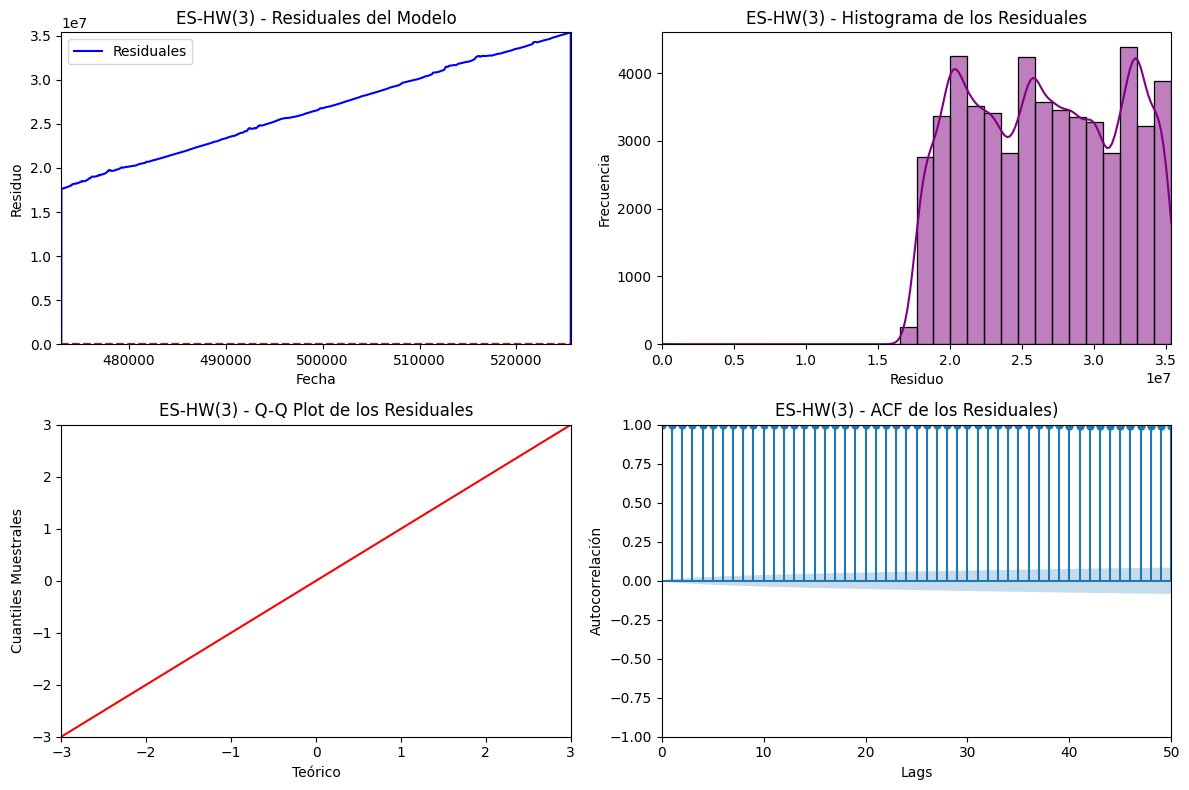

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Dividir los datos en entrenamiento, validación y test
train_size = int(0.8 * len(df))
valid_size = int(0.1 * len(df))

train_data = df.iloc[:train_size]
valid_data = df.iloc[train_size:train_size + valid_size]
test_data = df.iloc[train_size + valid_size:]

# **Función para el modelo Holt-Winters de orden 3 (ES-HW(3))**
def es_hw3_forecast(train, test, seasonal_periods=12, lambda_1=0.3, lambda_2=0.3):
    # Primer modelo Holt-Winters (ES-HW(1)) sobre los datos de entrenamiento
    model_hw1 = ExponentialSmoothing(train, trend='add', seasonal=None)
    fit_hw1 = model_hw1.fit(smoothing_level=lambda_1)
    hw1_predictions = fit_hw1.fittedvalues  # Predicciones de entrenamiento (ajustadas)

    # Segundo modelo Holt-Winters (ES-HW(2)) sobre las predicciones del primer modelo
    model_hw2 = ExponentialSmoothing(hw1_predictions, trend='add', seasonal='add', seasonal_periods=seasonal_periods)
    fit_hw2 = model_hw2.fit(smoothing_level=lambda_2)
    hw2_predictions = fit_hw2.forecast(len(test))  # Predicciones para el conjunto de test

    # Tercer modelo Holt-Winters (ES-HW(3)) sobre las predicciones del segundo modelo
    model_hw3 = ExponentialSmoothing(hw2_predictions, trend='add', seasonal='add', seasonal_periods=seasonal_periods)
    fit_hw3 = model_hw3.fit(smoothing_level=lambda_2)
    hw3_predictions = fit_hw3.forecast(len(test))  # Predicciones para el conjunto de test

    return hw1_predictions, hw2_predictions, hw3_predictions, fit_hw1, fit_hw2, fit_hw3

# **Ajuste del modelo ES-HW(3)**
hw1_predictions, hw2_predictions, hw3_predictions, fit_hw1, fit_hw2, fit_hw3 = es_hw3_forecast(train_data['Caudal'], test_data['Caudal'])

# **Calcular los residuos para el modelo ES-HW(3)**
residuals_hw3 = test_data['Caudal'] - hw3_predictions  # Calcular residuos

# Verificar si hay NaN en los residuos
if residuals_hw3.isna().sum() > 0:
    print("Advertencia: Los residuos contienen valores NaN. Procediendo a tratarlos.")
    residuals_hw3 = residuals_hw3.fillna(0)  # Reemplazar NaN por ceros si hay valores nulos

# **Visualización de los resultados**
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# **Gráfica 1: Residuales del modelo ES-HW(3)**
axs[0, 0].plot(residuals_hw3, label="Residuales", color='blue')
axs[0, 0].axhline(0, linestyle="dashed", color="red")
axs[0, 0].set_title("ES-HW(3) - Residuales del Modelo")
axs[0, 0].legend(loc='best')
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].set_ylabel('Residuo')
axs[0, 0].set_xlim(residuals_hw3.index[0], residuals_hw3.index[-1])  # Ajustar límite en X
axs[0, 0].set_ylim(min(residuals_hw3)-0.05, max(residuals_hw3)+0.05)  # Ajustar límite en Y

# **Gráfica 2: Histograma de los residuales**
sns.histplot(residuals_hw3, bins=30, kde=True, ax=axs[0, 1], color="purple")
axs[0, 1].set_title("ES-HW(3) - Histograma de los Residuales")
axs[0, 1].set_xlabel('Residuo')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].set_xlim(min(residuals_hw3)-0.05, max(residuals_hw3)+0.05)  # Ajustar límite en X

# **Gráfica 3: QQ Plot de los residuales**
sm.qqplot(residuals_hw3, line='45', ax=axs[1, 0])  # Aseguramos que la línea de 45 grados esté visible
axs[1, 0].set_title("ES-HW(3) - Q-Q Plot de los Residuales")
axs[1, 0].set_xlabel("Teórico")
axs[1, 0].set_ylabel("Cuantiles Muestrales")
axs[1, 0].set_xlim(-3, 3)  # Ajuste del límite en X para el QQ plot
axs[1, 0].set_ylim(-3, 3)  # Ajuste del límite en Y para el QQ plot

# **Gráfica 4: ACF de los residuales**
plot_acf(residuals_hw3, lags=50, alpha=0.05, ax=axs[1, 1])
axs[1, 1].set_title("ES-HW(3) - ACF de los Residuales)")
axs[1, 1].set_xlabel("Lags")
axs[1, 1].set_ylabel("Autocorrelación")
axs[1, 1].set_xlim(0, 50)  # Ajuste límite en X para ACF

# **Ajustar el diseño para que no se sobrepongan**
plt.tight_layout()

# **Guardar la figura en la ruta correcta**
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_9_ES-HW(3)_Residuos_Entrenamiento.png')

# **Mostrar la figura**
plt.show()





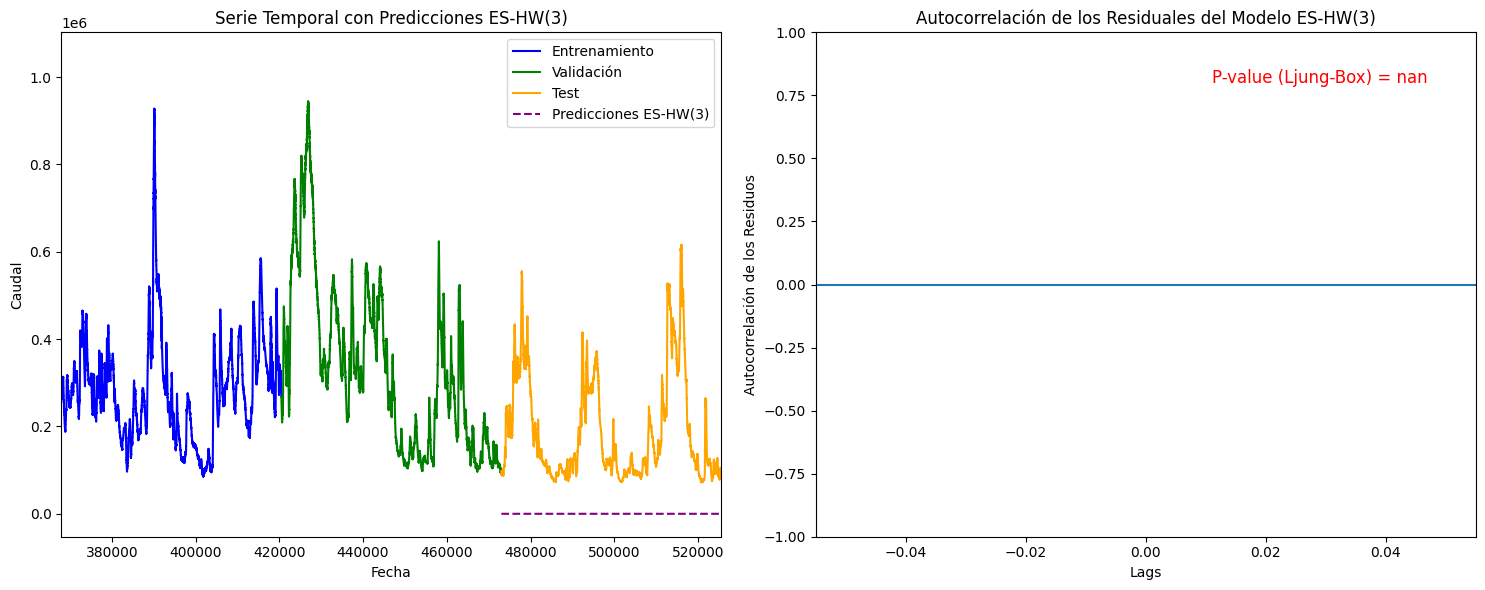

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Asegurarnos de que las predicciones no sean negativas
hw3_predictions_corrected = np.maximum(hw3_predictions, 0)  # Reemplazar valores negativos por 0

# **Graficar la serie temporal con las predicciones del modelo ES-HW(3)**
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Graficar los datos reales de entrenamiento, validación, test
axs[0].plot(train_data.index, train_data['Caudal'], label='Entrenamiento', color='blue')
axs[0].plot(valid_data.index, valid_data['Caudal'], label='Validación', color='green')
axs[0].plot(test_data.index, test_data['Caudal'], label='Test', color='orange')

# Graficar las predicciones del modelo ES-HW(3)
axs[0].plot(test_data.index, hw3_predictions_corrected, label='Predicciones ES-HW(3)', color='purple', linestyle='--')

# Ajustar la visualización para el zoom en el 30% final
zoom_fraction = 0.3
start_index = int(len(df) * (1 - zoom_fraction))  # Calcular el índice de inicio del zoom
axs[0].set_xlim(df.index[start_index], df.index[-1])

# Añadir etiquetas y título
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Caudal')
axs[0].set_title('Serie Temporal con Predicciones ES-HW(3)')
axs[0].legend()

# **Graficar la ACF de los residuos**
residuals_hw3_test = test_data['Caudal'] - hw3_predictions_corrected  # Calcular residuos

# Realizar la prueba de Ljung-Box
ljung_box_hw3 = acorr_ljungbox(residuals_hw3_test, lags=[10], return_df=True)
p_value_hw3 = ljung_box_hw3['lb_pvalue'].values[0]  # Extraer el p-valor

# Graficar la ACF de los residuos
plot_acf(residuals_hw3_test, lags=50, alpha=0.05, ax=axs[1])

# Añadir el p-valor de la prueba Ljung-Box sobre la gráfica (esquina superior derecha)
axs[1].text(0.6, 0.9, f'P-value (Ljung-Box) = {p_value_hw3:.4f}',
            transform=axs[1].transAxes, fontsize=12, color='red')

# Añadir título y etiquetas a la gráfica de ACF
axs[1].set_title("Autocorrelación de los Residuales del Modelo ES-HW(3)")
axs[1].set_xlabel("Lags")
axs[1].set_ylabel("Autocorrelación de los Residuos")

# Ajustar el diseño para que no se sobrepongan
plt.tight_layout()

# Guardar la figura en la ruta correcta
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_10_ES-HW(3)_Serie_Predicciones_y_ACF_Residuos.png')

# Mostrar la figura
plt.show()




In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.stats.diagnostic import acorr_ljungbox

# Función para calcular las métricas del modelo ES-HW(3)
def compute_metrics_hw3(y_real, y_pred):
    # Convertir a pandas Series asegurando que los índices coincidan
    y_real = pd.Series(y_real, index=test_data.index)
    y_pred = pd.Series(y_pred, index=test_data.index)

    # Reemplazar valores NaN en las predicciones con interpolación (o con 0 si es necesario)
    y_pred.fillna(method='ffill', inplace=True)  # Forward fill para evitar NaNs
    y_pred.fillna(method='bfill', inplace=True)  # Backward fill si el primer valor es NaN

    # Verificar si aún hay NaNs y eliminarlos si es necesario
    valid_idx = ~(y_real.isna() | y_pred.isna())  # Índices válidos
    y_real, y_pred = y_real[valid_idx], y_pred[valid_idx]  # Filtrar NaNs

    # Calcular residuos
    residuals = y_real - y_pred

    # Cálculo de métricas
    MAPE = mean_absolute_percentage_error(y_real, y_pred) * 100  # En porcentaje
    MAE = mean_absolute_error(y_real, y_pred)
    MSE = mean_squared_error(y_real, y_pred)
    RMSE = sqrt(MSE)

    # Prueba de Ljung-Box para autocorrelación en residuos
    ljung_box_test = acorr_ljungbox(residuals.dropna(), lags=[10], return_df=True)
    p_value_lb = ljung_box_test['lb_pvalue'].iloc[0]  # P-value del test

    # Crear un DataFrame con las métricas
    metrics_df = pd.DataFrame({
        "MAPE (%)": [MAPE],
        "MAE": [MAE],
        "RMSE": [RMSE],
        "MSE": [MSE],
        "P-value Ljung-Box": [p_value_lb]
    })

    return metrics_df, residuals

# Obtener las predicciones para el test set (usando el modelo ES-HW(3))
predictions_hw3_test = hw3_predictions  # Estas son las predicciones generadas por el modelo ES-HW(3)

# Calcular métricas
metrics_df_hw3, residuals_hw3 = compute_metrics_hw3(test_data['Caudal'], predictions_hw3_test)

# Mostrar las métricas en un DataFrame
print("Métricas del Modelo ES-HW(3):")
print(metrics_df_hw3)


Métricas del Modelo ES-HW(3):
       MAPE (%)           MAE          RMSE           MSE  P-value Ljung-Box
0  19257.328248  2.660408e+07  2.709400e+07  7.340847e+14                0.0


In [ ]:
# 2.6. SARIMA (Seasonal ARIMA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

# **Cargar los datos nuevamente si es necesario**
# Ruta donde se encuentran los datos
ruta_datos = '/content/drive/MyDrive/Modelado_Misisipi/Datos_Caudal_Mssp.csv'

# Cargar los datos
df = pd.read_csv(ruta_datos, parse_dates=['datetime'])

# Asegurarnos de que los nombres de las columnas no tengan espacios
df.rename(columns=lambda x: x.strip(), inplace=True)

# Verificar que 'Caudal' es la columna de interés en los datos
if 'Caudal' in df.columns:
    # Dividir los datos en entrenamiento, validación y test
    train_size = int(0.8 * len(df))
    valid_size = int(0.1 * len(df))

    train_data = df.iloc[:train_size]
    valid_data = df.iloc[train_size:train_size + valid_size]
    test_data = df.iloc[train_size + valid_size:]

    # Escalar los datos
    scaler = StandardScaler()

    # Escalar los conjuntos de entrenamiento, validación y test
    train_scaled = scaler.fit_transform(train_data[['Caudal']])
    valid_scaled = scaler.transform(valid_data[['Caudal']])
    test_scaled = scaler.transform(test_data[['Caudal']])

    # Convertir los datos escalados a DataFrame manteniendo el índice original
    train_scaled_df = pd.DataFrame(train_scaled, columns=['Caudal'], index=train_data.index)
    valid_scaled_df = pd.DataFrame(valid_scaled, columns=['Caudal'], index=valid_data.index)
    test_scaled_df = pd.DataFrame(test_scaled, columns=['Caudal'], index=test_data.index)

    # Mostrar las primeras filas de los datos escalados
    print("\nEntrenamiento escalado:\n", train_scaled_df.head())
    print("\nValidación escalada:\n", valid_scaled_df.head())
    print("\nTest escalado:\n", test_scaled_df.head())
else:
    print("Error: La columna 'Caudal' no se encuentra en los datos.")

# **Configuración del modelo SARIMA**
# Definir los parámetros SARIMA (p, d, q) para la parte ARIMA y (P, D, Q, s) para la parte estacional
p, d, q = 1, 1, 1  # Orden de la parte no estacional (AR, I, MA)
P, D, Q, s = 1, 0, 0, 12  # Simplificar la parte estacional

# Aplicar SARIMA al conjunto de entrenamiento escalado
sarima_model = SARIMAX(train_scaled_df['Caudal'],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, s),
                       enforce_stationarity=False,
                       enforce_invertibility=False,
                       trend='c')  # Añadir un término de tendencia

# Ajustar el modelo con una opción más eficiente en memoria
sarima_fitted = sarima_model.fit(disp=False, method='powell', maxiter=50)

# Realizar predicciones en el conjunto de test escalado
predictions_sarima_scaled = sarima_fitted.forecast(steps=len(test_scaled_df))

# Desescalar las predicciones
predictions_sarima = scaler.inverse_transform(np.array(predictions_sarima_scaled).reshape(-1, 1)).flatten()

# Mostrar las primeras predicciones
print(f"Primeras predicciones SARIMA:\n{predictions_sarima[:5]}")



Entrenamiento escalado:
      Caudal
0 -0.246310
1 -0.248001
2 -0.249691
3 -0.248001
4 -0.246310

Validación escalada:
           Caudal
420479  0.135751
420480  0.135751
420481  0.128989
420482  0.128989
420483  0.122226

Test escalado:
           Caudal
473038 -1.016518
473039 -1.019223
473040 -1.019899
473041 -1.021251
473042 -1.021928
Primeras predicciones SARIMA:
[267839.50462531 267879.54040248 267812.24878934 267765.16832157
 267763.27438773]


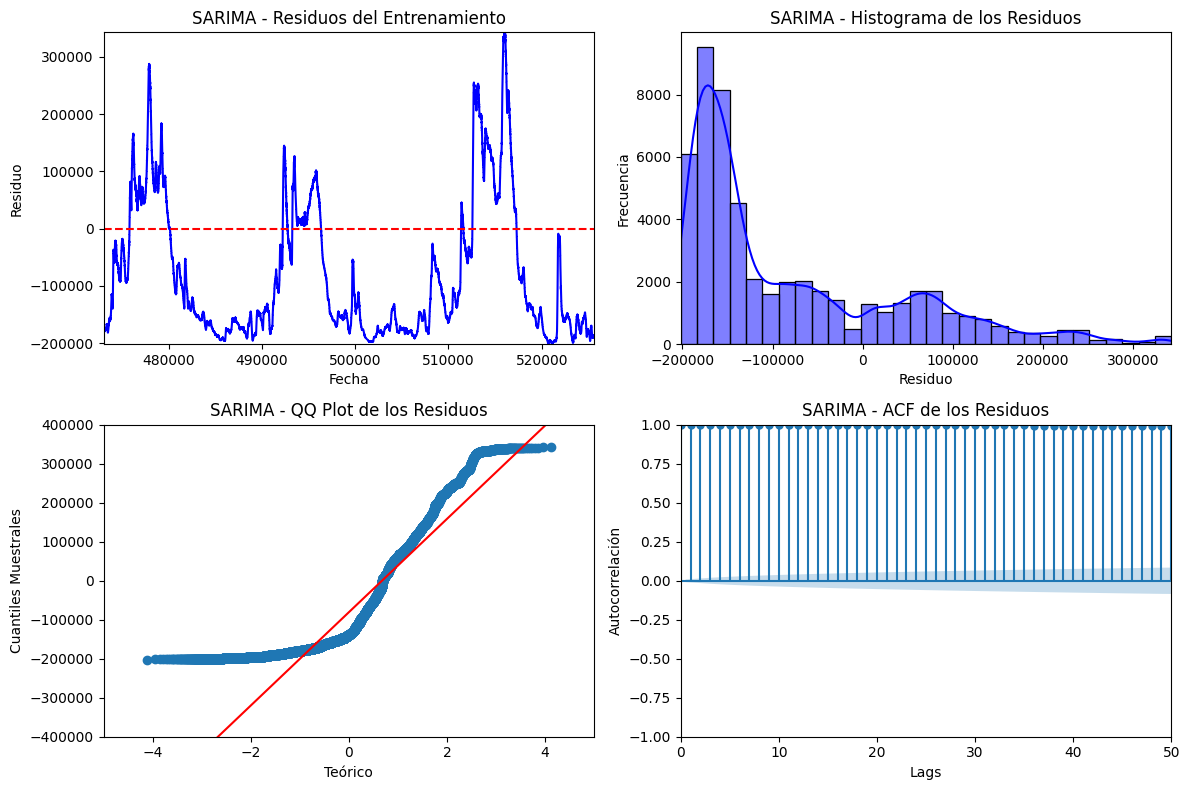

In [ ]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Calcular los residuos del modelo SARIMA
residuals_sarima = test_data['Caudal'] - predictions_sarima

# Crear la figura con 2 filas y 2 columnas
fig1, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Residuos del entrenamiento
axs[0, 0].plot(residuals_sarima, color='blue')
axs[0, 0].axhline(0, linestyle='--', color='red')
axs[0, 0].set_title("SARIMA - Residuos del Entrenamiento")
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].set_ylabel('Residuo')
axs[0, 0].set_xlim(residuals_sarima.index[0], residuals_sarima.index[-1])  # Ajuste límite en X
axs[0, 0].set_ylim(min(residuals_sarima)-0.05, max(residuals_sarima)+0.05)  # Ajuste límite en Y

# 2. Histograma de los residuos
sns.histplot(residuals_sarima, bins=30, kde=True, ax=axs[0, 1], color='blue')
axs[0, 1].set_title("SARIMA - Histograma de los Residuos")
axs[0, 1].set_xlabel('Residuo')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].set_xlim(min(residuals_sarima)-0.05, max(residuals_sarima)+0.05)  # Ajustar límite en X

# 3. QQ Plot de los residuos
sm.qqplot(residuals_sarima, line='s', ax=axs[1, 0])
axs[1, 0].set_title("SARIMA - QQ Plot de los Residuos")
axs[1, 0].set_xlabel("Teórico")
axs[1, 0].set_ylabel("Cuantiles Muestrales")
axs[1, 0].set_xlim(-5, 5)  # Ajuste del límite en X para el QQ plot
axs[1, 0].set_ylim(-400000, 400000)  # Ajuste del límite en Y para el QQ plot

# 4. ACF de los residuos
plot_acf(residuals_sarima, lags=50, alpha=0.05, ax=axs[1, 1])
axs[1, 1].set_title("SARIMA - ACF de los Residuos")
axs[1, 1].set_xlabel("Lags")
axs[1, 1].set_ylabel("Autocorrelación")
axs[1, 1].set_xlim(0, 50)  # Ajuste límite en X para ACF

# Ajustar el diseño de los gráficos
plt.tight_layout()

# **Guardar la figura en la ruta correcta**
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_11_ES-SARIMA_Residuos_Entrenamiento.png')

# Mostrar la figura
plt.show()


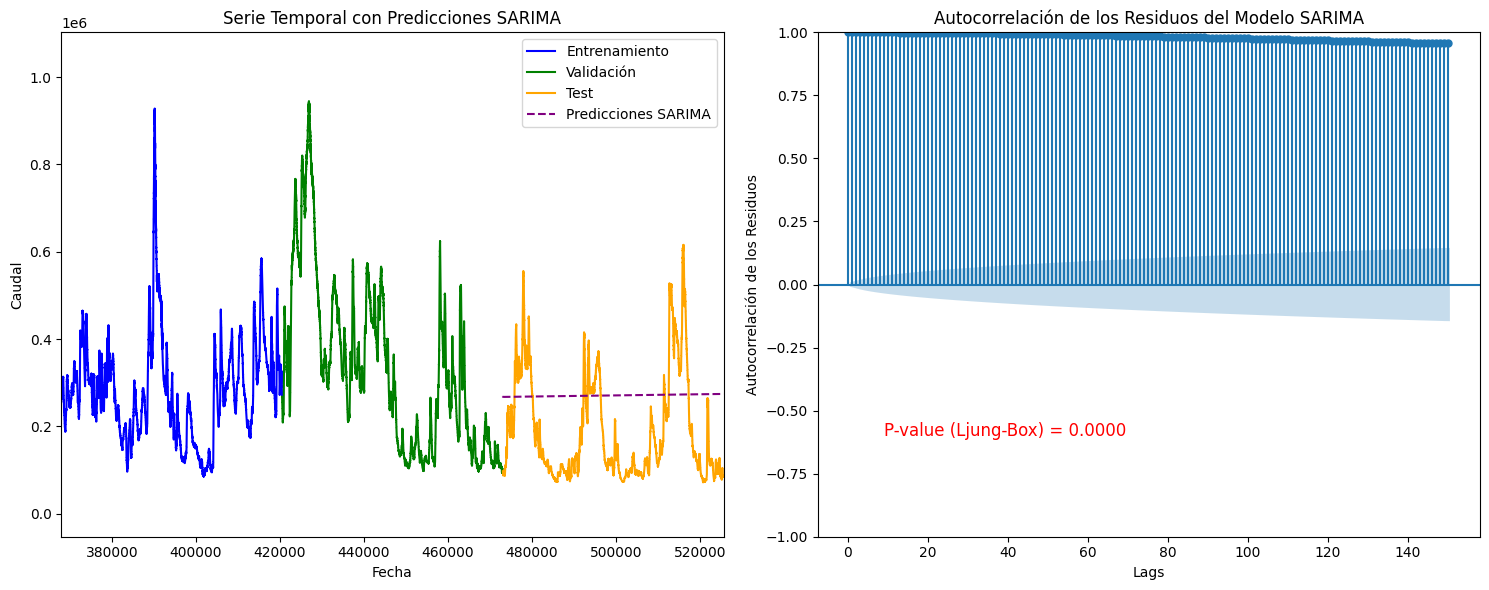

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Crear la figura con 1 fila y 2 columnas
fig2, axs = plt.subplots(1, 2, figsize=(15, 6))

# Graficar los datos reales de entrenamiento, validación, test
axs[0].plot(train_data.index, train_data['Caudal'], label='Entrenamiento', color='blue')
axs[0].plot(valid_data.index, valid_data['Caudal'], label='Validación', color='green')
axs[0].plot(test_data.index, test_data['Caudal'], label='Test', color='orange')

# Graficar las predicciones del modelo SARIMA
axs[0].plot(test_data.index, predictions_sarima, label='Predicciones SARIMA', color='purple', linestyle='--')

# Ajustar la visualización para el zoom en el 30% final
zoom_fraction = 0.3
start_index = int(len(df) * (1 - zoom_fraction))  # Calcular el índice de inicio del zoom
axs[0].set_xlim(df.index[start_index], df.index[-1])

# Añadir etiquetas y título
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Caudal')
axs[0].set_title('Serie Temporal con Predicciones SARIMA')
axs[0].legend()

# Graficar la ACF de los residuos
plot_acf(residuals_sarima, lags=150, alpha=0.05, ax=axs[1])  # Usar un número razonable de lags

# Realizar la prueba de Ljung-Box para el p-valor
ljung_box_sarima = acorr_ljungbox(residuals_sarima, lags=[10], return_df=True)
p_value_sarima = ljung_box_sarima['lb_pvalue'].values[0]  # Extraer el p-valor

# Añadir el p-valor de la prueba Ljung-Box sobre la gráfica (esquina superior derecha)
axs[1].text(0.1, 0.2, f'P-value (Ljung-Box) = {p_value_sarima:.4f}',
            transform=axs[1].transAxes, fontsize=12, color='red')

# Título y etiquetas para la gráfica de ACF
axs[1].set_title("Autocorrelación de los Residuos del Modelo SARIMA")
axs[1].set_xlabel("Lags")
axs[1].set_ylabel("Autocorrelación de los Residuos")

# Ajustar la disposición de los gráficos
plt.tight_layout()

# Guardar la figura en la ruta correcta
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_12_SARIMA_Serie_Predicciones_y_ACF_Residuos.png')

# Mostrar la figura
plt.show()




In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox

# Cálculo de las métricas para SARIMA
MAPE = mean_absolute_percentage_error(test_data['Caudal'], predictions_sarima) * 100  # En porcentaje
MAE = mean_absolute_error(test_data['Caudal'], predictions_sarima)
MSE = mean_squared_error(test_data['Caudal'], predictions_sarima)
RMSE = sqrt(MSE)

# Crear un DataFrame con las métricas
metrics = {
    'MAPE (%)': [MAPE],
    'MAE': [MAE],
    'RMSE': [RMSE],
    'MSE': [MSE]
}

metrics_df = pd.DataFrame(metrics)

# **Cálculo del p-valor Ljung-Box para los residuos**
ljung_box_test = acorr_ljungbox(residuals_sarima, lags=[10], return_df=True)
p_value_sarima = ljung_box_test['lb_pvalue'].values[0]

# Añadir el p-valor a las métricas
metrics_df['P-value Ljung-Box'] = p_value_sarima

# Mostrar las métricas en un DataFrame
print("Métricas del Modelo SARIMA:")
print(metrics_df)


Métricas del Modelo SARIMA:
     MAPE (%)            MAE          RMSE           MSE  P-value Ljung-Box
0  106.596234  131727.407805  144422.93559  2.085798e+10                0.0


2.7. GARCH

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install arch
from arch import arch_model
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Cargar los datos desde el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Modelado_Misisipi/Datos_Caudal_Mssp.csv', parse_dates=['datetime'])

# Verificar que la columna 'Caudal' esté correctamente presente en los datos
print(df.columns)

# Dividir los datos en entrenamiento, validación y test
train_size = int(0.8 * len(df))
valid_size = int(0.1 * len(df))

train_data = df.iloc[:train_size]
valid_data = df.iloc[train_size:train_size + valid_size]
test_data = df.iloc[train_size + valid_size:]

# Convertir a retornos logarítmicos
train_data['log_returns'] = np.log(train_data['Caudal']) - np.log(train_data['Caudal'].shift(1))
train_data.dropna(inplace=True)  # Eliminar valores NaN generados por el shift

# Verifica si hay valores NaN o infinitos en los retornos logarítmicos
print(train_data['log_returns'].isnull().sum())  # Verifica valores NaN
print(np.isinf(train_data['log_returns']).sum())  # Verifica valores infinitos

# Reemplazar los valores infinitos por NaN y eliminar cualquier fila con NaN
train_data['log_returns'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Reemplaza infinitos con NaN
train_data.dropna(inplace=True)  # Elimina filas con NaN

# Verificar que no haya más valores NaN o infinitos
print(f"NaN en los retornos logarítmicos: {train_data['log_returns'].isnull().sum()}")
print(f"Infinito en los retornos logarítmicos: {np.isinf(train_data['log_returns']).sum()}")




Index(['datetime', 'Caudal'], dtype='object')
0
2
NaN en los retornos logarítmicos: 0
Infinito en los retornos logarítmicos: 0


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-11-9490f41270f4>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['log_returns'] = np.log(train_data['Caudal']) - np.log(train_data['Caudal'].shift(1))
<ipython-input-11-9490f41270f4>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.dropna(inplace=True)  # Eliminar valores NaN generados por el shift
<ipython-input-11-9490f41270f4>:34: FutureWarning: A val

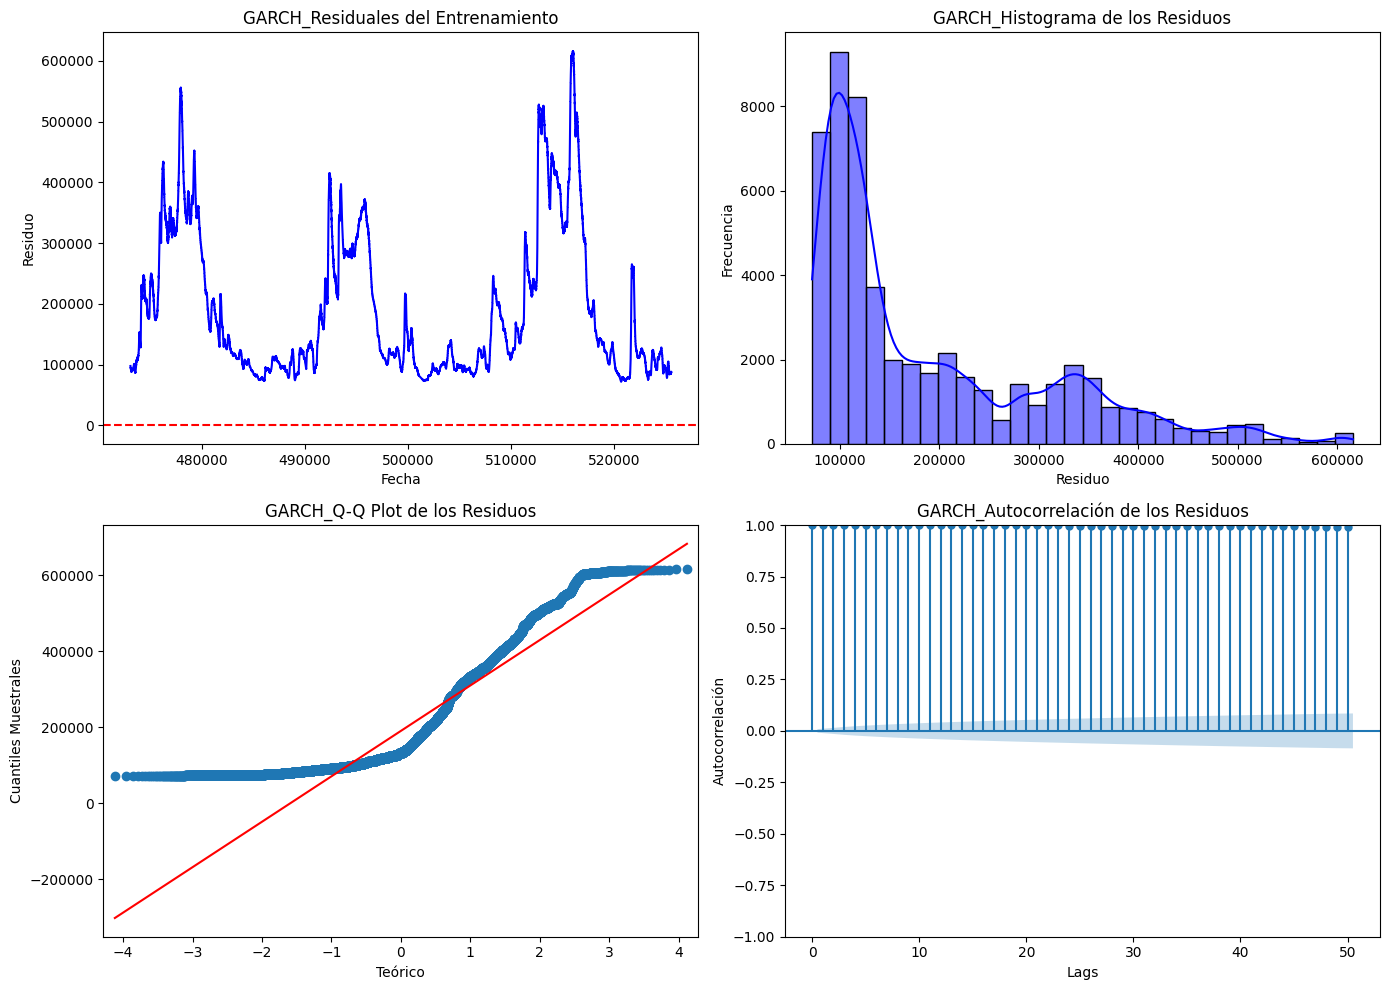

In [ ]:
# Predicción
garch_forecast = garch_model.forecast(horizon=len(test_data), reindex=False)

# Convertir predicción a valores de caudal reales
garch_pred = np.exp(garch_forecast.variance.values[-1])

# Cálculo de los residuos
residuos_garch = test_data['Caudal'] - garch_pred

# Crear la figura con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# **Gráfica 1: Residuos del GARCH**
axs[0, 0].plot(residuos_garch, color='blue')
axs[0, 0].axhline(0, linestyle='--', color='red')
axs[0, 0].set_title("GARCH_Residuales del Entrenamiento")
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].set_ylabel('Residuo')

# **Gráfica 2: Histograma de los residuos**
sns.histplot(residuos_garch, bins=30, kde=True, ax=axs[0, 1], color='blue')
axs[0, 1].set_title("GARCH_Histograma de los Residuos")
axs[0, 1].set_xlabel('Residuo')
axs[0, 1].set_ylabel('Frecuencia')

# **Gráfica 3: QQ plot de los residuos**
sm.qqplot(residuos_garch, line='s', ax=axs[1, 0])
axs[1, 0].set_title("GARCH_Q-Q Plot de los Residuos")
axs[1, 0].set_xlabel('Teórico')
axs[1, 0].set_ylabel('Cuantiles Muestrales')

# **Gráfica 4: ACF de los residuos**
plot_acf(residuos_garch, lags=50, alpha=0.05, ax=axs[1, 1])
axs[1, 1].set_title("GARCH_Autocorrelación de los Residuos")
axs[1, 1].set_xlabel("Lags")
axs[1, 1].set_ylabel("Autocorrelación")

# Ajustar el diseño para que no se sobrepongan
plt.tight_layout()

# Guardar la figura en la ruta correcta
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_13_Residuos_GARCH.png')

# Mostrar la figura
plt.show()


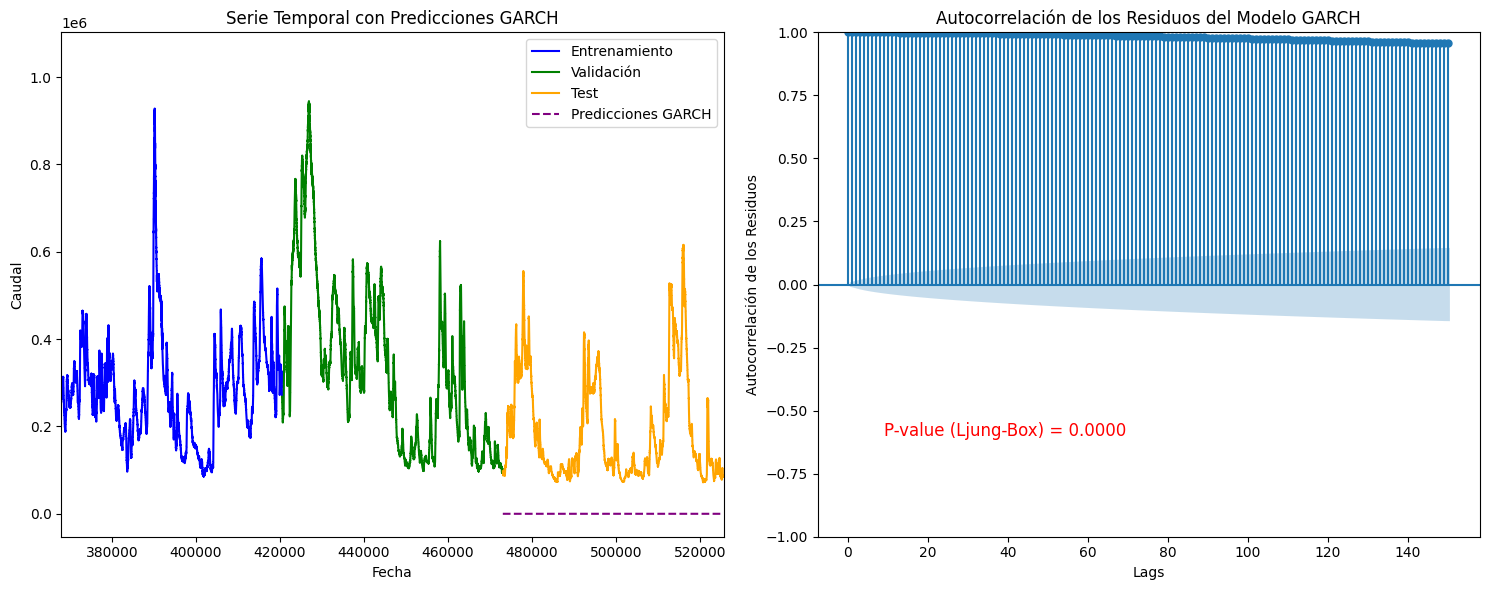

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Predicción con el modelo GARCH
garch_forecast = garch_model.forecast(horizon=len(test_data), reindex=False)

# Convertir la predicción a valores de caudal reales
garch_pred = np.exp(garch_forecast.variance.values[-1])

# Calcular los residuos
residuos_garch_test = test_data['Caudal'] - garch_pred

# **Crear la figura con 1 fila y 2 columnas**
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# **Gráfico 1: Serie Temporal con las predicciones GARCH**
axs[0].plot(train_data.index, train_data['Caudal'], label='Entrenamiento', color='blue')
axs[0].plot(valid_data.index, valid_data['Caudal'], label='Validación', color='green')
axs[0].plot(test_data.index, test_data['Caudal'], label='Test', color='orange')

# Graficar las predicciones GARCH
axs[0].plot(test_data.index, garch_pred, label='Predicciones GARCH', color='purple', linestyle='--')

# Ajustar la visualización para el zoom en el 30% final
zoom_fraction = 0.3
start_index = int(len(df) * (1 - zoom_fraction))  # Calcular el índice de inicio del zoom
axs[0].set_xlim(df.index[start_index], df.index[-1])

# Añadir etiquetas y título
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Caudal')
axs[0].set_title('Serie Temporal con Predicciones GARCH')
axs[0].legend()

# **Gráfico 2: ACF de los residuos GARCH**
plot_acf(residuos_garch_test, lags=150, alpha=0.05, ax=axs[1])

# **Agregar el p-valor de Ljung-Box**
ljung_box_test = acorr_ljungbox(residuos_garch_test, lags=[10], return_df=True)
p_value_ljung_box = ljung_box_test['lb_pvalue'].iloc[-1]  # P-valor para el último lag
axs[1].text(0.1, 0.2, f'P-value (Ljung-Box) = {p_value_ljung_box:.4f}',
            transform=axs[1].transAxes, fontsize=12, color='red')

# **Configurar el gráfico ACF**
axs[1].set_title("Autocorrelación de los Residuos del Modelo GARCH")
axs[1].set_xlabel("Lags")
axs[1].set_ylabel("Autocorrelación de los Residuos")

# Ajustar la disposición de los gráficos
plt.tight_layout()

# **Guardar la figura en la ruta correcta**
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_14_Serie_Predicciones_y_ACF_GARCH_Residuos.png')

# **Mostrar la figura**
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.stats.diagnostic import acorr_ljungbox

# Cálculo de las métricas para el modelo GARCH
MAPE = mean_absolute_percentage_error(test_data['Caudal'], garch_pred) * 100  # En porcentaje
MAE = mean_absolute_error(test_data['Caudal'], garch_pred)
MSE = mean_squared_error(test_data['Caudal'], garch_pred)
RMSE = sqrt(MSE)

# Cálculo de los residuos
residuos_garch_test = test_data['Caudal'] - garch_pred

# Prueba de Ljung-Box para los residuos
ljung_box_test = acorr_ljungbox(residuos_garch_test, lags=[10], return_df=True)
p_value_ljung_box = ljung_box_test['lb_pvalue'].iloc[-1]  # P-valor para el último lag

# Crear un DataFrame con las métricas y p-value
metrics = {
    'MAPE (%)': [MAPE],
    'MAE': [MAE],
    'RMSE': [RMSE],
    'MSE': [MSE],
    'P-value Ljung-Box': [p_value_ljung_box]
}

metrics_df = pd.DataFrame(metrics)

# Mostrar las métricas en un DataFrame
print("Métricas del Modelo GARCH:")
print(metrics_df)


Métricas del Modelo GARCH:
    MAPE (%)            MAE           RMSE           MSE  P-value Ljung-Box
0  99.999283  190223.772125  224673.042341  5.047798e+10                0.0


In [ ]:
import pandas as pd

# Guarda en CSV o pickle después del escalado
df.to_csv('/content/drive/MyDrive/dataset_procesado.csv', index=False)

2.8. MLP - Perceptrón Multicapa

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['datetime', 'Caudal'], dtype='object')
Epoch 1/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 3.0741e-04
Epoch 2/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 3.9907e-06
Epoch 3/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 3.5938e-06
Epoch 4/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 2.8881e-06
Epoch 5/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 2.6330e-06
Epoch 6/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 3.0439e-06
Epoch 7/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 2.5695e-06
Epoch 8/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 2.4428e-06
Epoch 9/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 2.3810e-06
Epoch 10/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 2.4106e-06
Epoch 11/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss

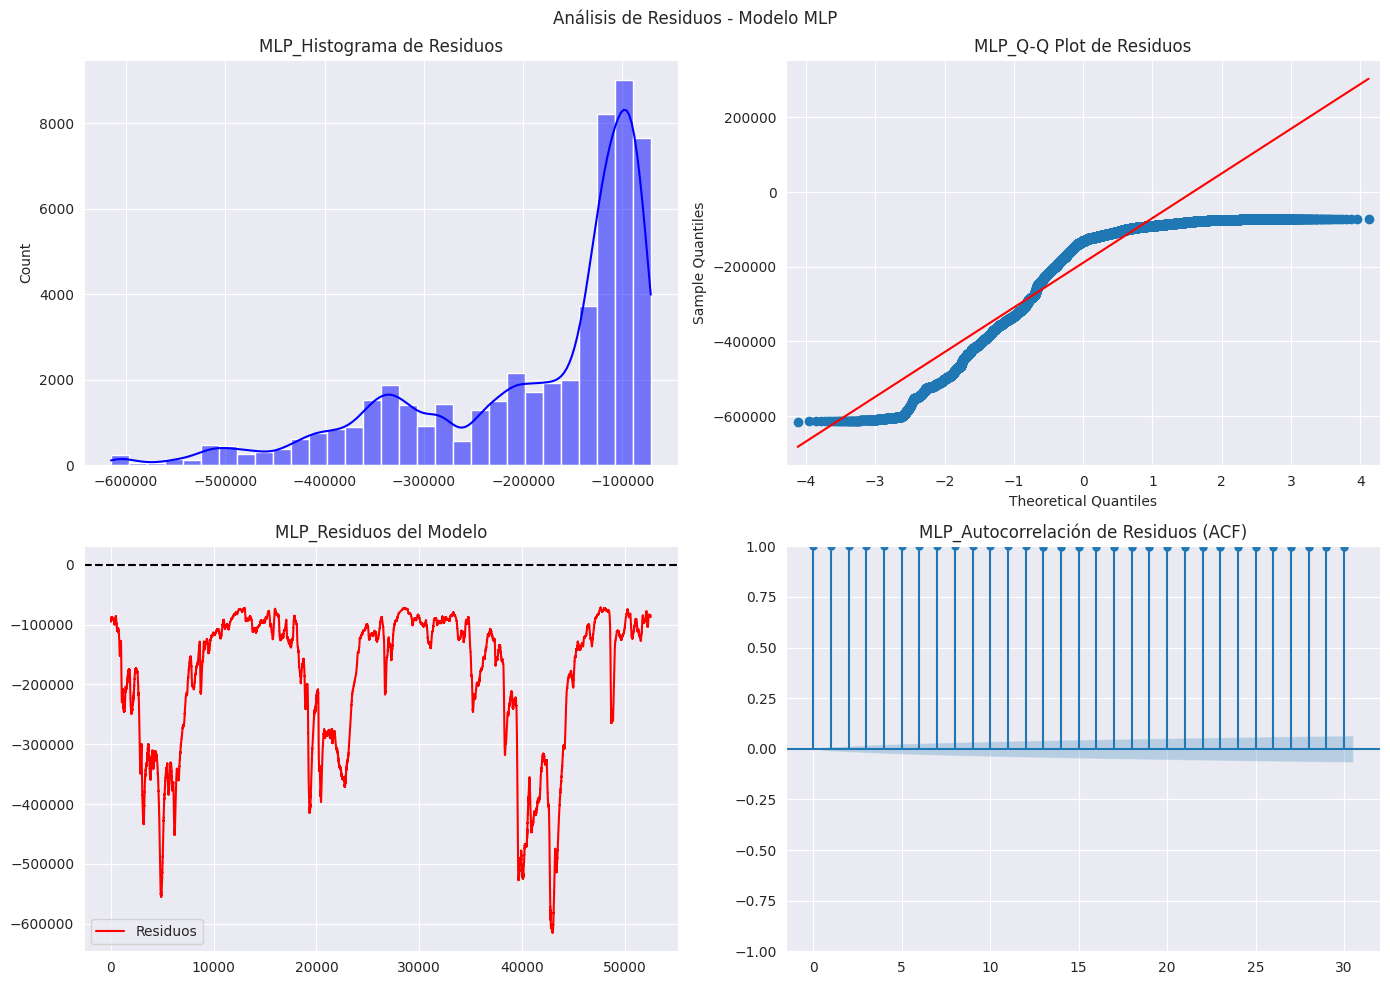

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Cargar los datos desde el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Modelado_Misisipi/Datos_Caudal_Mssp.csv', parse_dates=['datetime'])

# Verificar que la columna 'Caudal' esté correctamente presente en los datos
print(df.columns)

# Dividir los datos en entrenamiento, validación y test
train_size = int(0.8 * len(df))
valid_size = int(0.1 * len(df))

train_data = df.iloc[:train_size]
valid_data = df.iloc[train_size:train_size + valid_size]
test_data = df.iloc[train_size + valid_size:]

# Datos de entrenamiento
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['Caudal']])
test_scaled = scaler.transform(test_data[['Caudal']])

# Crear datos de entrenamiento
X_train, y_train = [], []
n_steps = 10  # Ventana de tiempo
for i in range(len(train_scaled) - n_steps):
    X_train.append(train_scaled[i:i + n_steps])
    y_train.append(train_scaled[i + n_steps])

X_train, y_train = np.array(X_train), np.array(y_train)

# Modelo MLP
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(n_steps,)),
    Dense(64, activation='relu'),
    Dense(1)
])

mlp_model.compile(optimizer='adam', loss='mse')

# Entrenamiento
mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Preparar datos de prueba
X_test, y_test_real = [], []
for i in range(len(test_scaled) - n_steps):
    X_test.append(test_scaled[i:i + n_steps])
    y_test_real.append(test_scaled[i + n_steps])

X_test, y_test_real = np.array(X_test), np.array(y_test_real)

# Predicciones
mlp_pred = mlp_model.predict(X_test)
mlp_pred = scaler.inverse_transform(mlp_pred)  # Desescalar

# Cálculo de los residuos
residuos_mlp = y_test_real.flatten() - mlp_pred.flatten()

# Figura 15 - Análisis de Residuos del Modelo MLP (Entrenamiento)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Análisis de Residuos - Modelo MLP")

# **Histograma de los residuos**
sns.histplot(residuos_mlp, kde=True, bins=30, color="blue", ax=axs[0, 0])
axs[0, 0].set_title("MLP_Histograma de Residuos")

# **Q-Q Plot**
sm.qqplot(residuos_mlp, line="s", ax=axs[0, 1])
axs[0, 1].set_title("MLP_Q-Q Plot de Residuos")

# **Residuos del Modelo MLP**
axs[1, 0].plot(residuos_mlp, label="Residuos", color="red")
axs[1, 0].axhline(y=0, linestyle="dashed", color="black")
axs[1, 0].set_title("MLP_Residuos del Modelo")
axs[1, 0].legend()

# **ACF de los residuos**
plot_acf(residuos_mlp, lags=30, ax=axs[1, 1])
axs[1, 1].set_title("MLP_Autocorrelación de Residuos (ACF)")

# Ajustar el diseño
plt.tight_layout()

# Guardar la figura
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_15_Residuos_MLP.png')

# Mostrar la figura
plt.show()


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# 📌 Cálculo de los residuos
residuos_mlp = y_test.to_numpy()- mlp_pred.flatten()


# 📌 Calcular p-valor de la prueba de Ljung-Box para MLP
ljung_box_test = acorr_ljungbox(residuos_mlp, lags=[10], return_df=True)
p_valor_mlp = ljung_box_test['lb_pvalue'].values[0]

# 📌 Crear la figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 📌 Residuales (arriba izquierda)
axes[0, 0].plot(residuos_mlp, label="Residuales MLP", color='blue')
axes[0, 0].axhline(0, linestyle="dashed", color="red")
axes[0, 0].set_title("Residuales del modelo MLP")
axes[0, 0].legend()

# 📌 Histograma de residuales (arriba derecha)
sns.histplot(residuos_mlp, bins=30, kde=True, ax=axes[0, 1], color="purple")
axes[0, 1].set_title("Histograma de los residuales MLP")

# 📌 Q-Q Plot (abajo izquierda)
sm.qqplot(residuos_mlp, line='s', ax=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot de los residuales MLP")

# 📌 ACF (abajo derecha) con p-valor de Ljung-Box
plot_acf(residuos_mlp, lags=30, ax=axes[1, 1])
axes[1, 1].set_title(f"Autocorrelación de los residuales MLP\n(p-valor Ljung-Box: {p_valor_mlp:.4f})")

# 📌 Ajustar espacio entre gráficos
plt.tight_layout()
plt.show()



# Ajustar el diseño para que no se sobrepongan
plt.tight_layout()

# Guardar la figura en la ruta correcta
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_16_MLP_Serie_Predicciones_y_ACF_Residuos.png')

# Mostrar la figura
plt.show()


NameError: name 'y_test' is not defined

In [14]:
print(train_data.shape)
print(mlp_pred.shape)

(420479, 2)
(52551, 1)


In [16]:
import numpy as np

train_data_np = train_data.to_numpy()
train_data_recortado = train_data_np[:mlp_pred.shape[0], :]

# Verificar las nuevas formas
print(train_data_recortado.shape)
print(mlp_pred.shape)

# Realizar la operacion que necesites.
# Asumiendo que quieres restar la primera columna de train_data_recortado con mlp_pred.
resultado = train_data_recortado[:, 0] - mlp_pred[:, 0].flatten()

print(resultado.shape)

(52551, 2)
(52551, 1)


TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [17]:
import pandas as pd
import numpy as np

train_data_recortado[:, 0] = pd.to_numeric(train_data_recortado[:, 0], errors='coerce')

# Eliminar filas con NaN
train_data_recortado = train_data_recortado[~np.isnan(train_data_recortado[:, 0])]
mlp_pred = mlp_pred[:train_data_recortado.shape[0]]

# Realizar la operación
resultado = train_data_recortado[:, 0] - mlp_pred[:, 0].flatten()

print(resultado.shape)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.stats.diagnostic import acorr_ljungbox

# Cálculo de las métricas para el modelo MLP
MAPE = mean_absolute_percentage_error(y_test_real, mlp_pred) * 100  # En porcentaje
MAE = mean_absolute_error(y_test_real, mlp_pred)
MSE = mean_squared_error(y_test_real, mlp_pred)
RMSE = sqrt(MSE)

# Prueba Ljung-Box para autocorrelación de residuos
ljung_box_test = acorr_ljungbox(residuos_mlp, lags=[10], return_df=True)
p_value_ljung_box = ljung_box_test['lb_pvalue'].iloc[-1]  # Último p-value para los lags especificados

# Crear un DataFrame con las métricas y el p-value
metrics = {
    'MAPE (%)': [MAPE],
    'MAE': [MAE],
    'RMSE': [RMSE],
    'MSE': [MSE],
    'P-value Ljung-Box': [p_value_ljung_box]
}

metrics_df = pd.DataFrame(metrics)

# Mostrar las métricas
print("Métricas del Modelo MLP:")
print(metrics_df)


Métricas del Modelo MLP:
       MAPE (%)            MAE           RMSE           MSE  P-value Ljung-Box
0  1.023467e+08  173687.656167  196138.438137  3.847029e+10                0.0


2.9. RNN - Redes neuronales recurrentes

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13140/13140 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 6.9695e-04
Epoch 2/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 2.7025e-06
Epoch 3/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 1.9744e-06
Epoch 4/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - loss: 2.0711e-06
Epoch 5/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 2.0796e-06
Epoch 6/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 1.8878e-06
Epoch 7/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 2.0338e-06
Epoch 8/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 1.7917e-06
Epoch 9/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step - loss: 2.1680e-06
Epoch 10/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 1.7766e-06
Epoch 11/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - loss: 1.7771e-06
Epoch 12/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 73s 3ms/step - loss: 1.7872e-06
Epoch 13/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 1.8714e-06
Epoch 14/20
13140/1

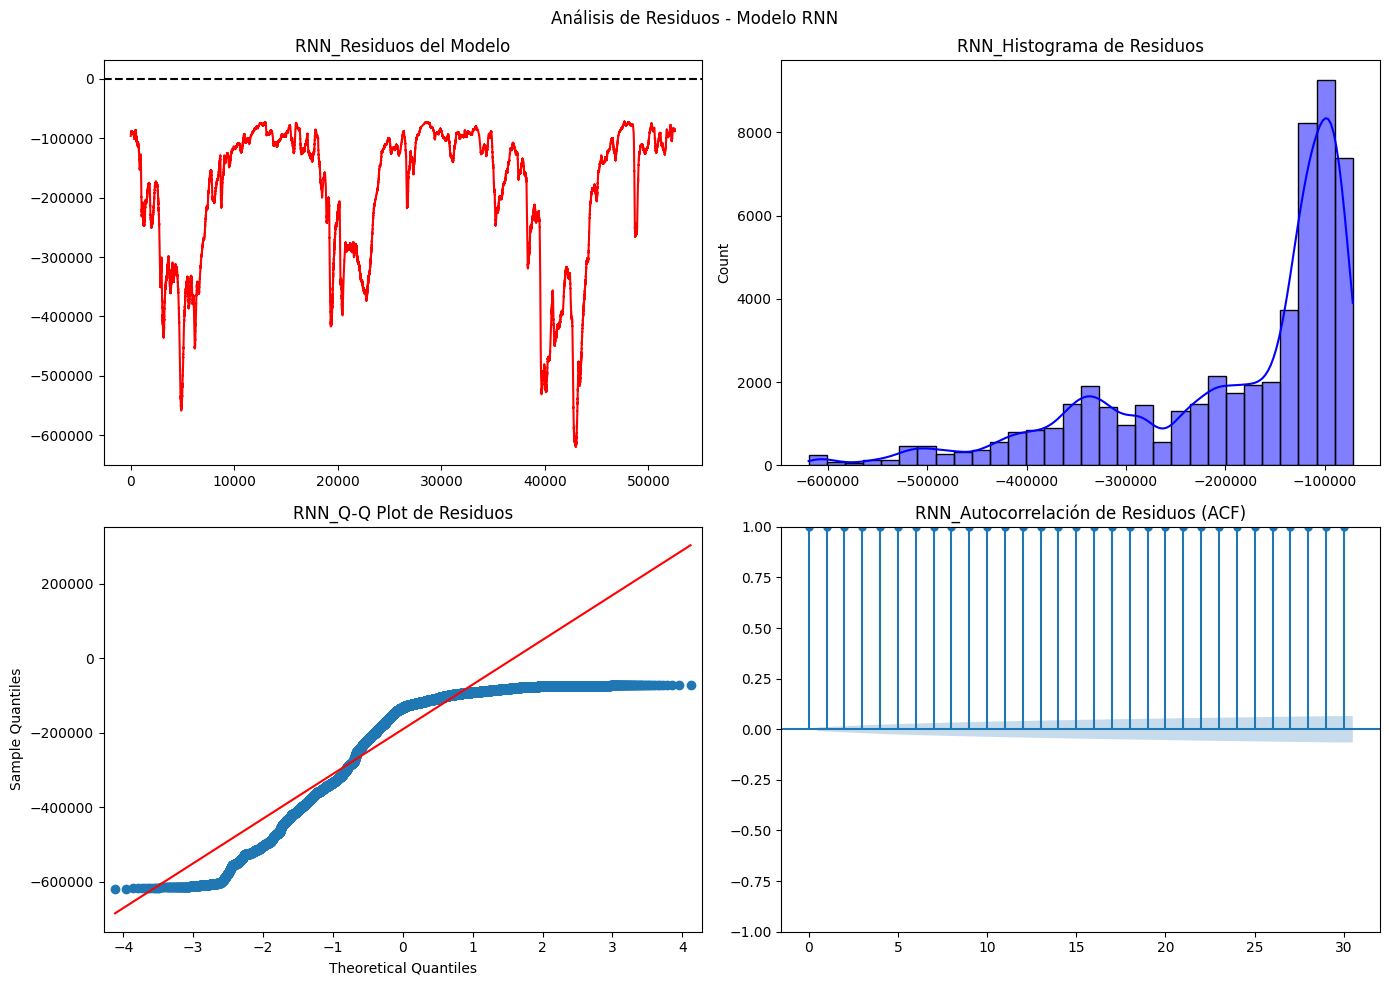

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convertir datos a formato adecuado
n_steps = 10  # Tamaño de la ventana

# Crear datos de entrenamiento para RNN
X_train, y_train = [], []
for i in range(len(train_scaled) - n_steps):
    X_train.append(train_scaled[i:i + n_steps])
    y_train.append(train_scaled[i + n_steps])

X_train, y_train = np.array(X_train), np.array(y_train)

# Construcción del modelo RNN
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')

# Entrenamiento
rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predicciones en el conjunto de test
X_test, y_test_real = [], []
for i in range(len(test_scaled) - n_steps):
    X_test.append(test_scaled[i:i + n_steps])
    y_test_real.append(test_scaled[i + n_steps])

X_test, y_test_real = np.array(X_test), np.array(y_test_real)

# Predicciones RNN
rnn_pred = rnn_model.predict(X_test)
rnn_pred = scaler.inverse_transform(rnn_pred)  # Desescalar

# Cálculo de los residuos
residuos_rnn = y_test_real.flatten() - rnn_pred.flatten()

# Figura 17 - Análisis de Residuos del Modelo RNN (Entrenamiento)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Análisis de Residuos - Modelo RNN")

# Gráfica de residuos del entrenamiento (Cuadrante fila 1, columna 1)
axs[0, 0].plot(residuos_rnn, label="Residuos", color="red")
axs[0, 0].axhline(y=0, linestyle="dashed", color="black")
axs[0, 0].set_title("RNN_Residuos del Modelo")

# Histograma de los residuos del entrenamiento (Cuadrante fila 1, columna 2)
sns.histplot(residuos_rnn, kde=True, bins=30, color="blue", ax=axs[0, 1])
axs[0, 1].set_title("RNN_Histograma de Residuos")

# Q-Q plot en el entrenamiento (Cuadrante fila 2, columna 1)
sm.qqplot(residuos_rnn, line="s", ax=axs[1, 0])
axs[1, 0].set_title("RNN_Q-Q Plot de Residuos")

# ACF de los residuos en el entrenamiento (Cuadrante fila 2, columna 2)
plot_acf(residuos_rnn, lags=30, ax=axs[1, 1])
axs[1, 1].set_title("RNN_Autocorrelación de Residuos (ACF)")

# Ajustar el diseño
plt.tight_layout()

# Guardar la figura
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_17_Residuos_RNN.png')

# Mostrar la figura
plt.show()



Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13140/13140 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.0013
Epoch 2/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 3.4190e-04
Epoch 3/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 3.3651e-04
Epoch 4/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - loss: 3.3491e-04
Epoch 5/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 3.3458e-04
Epoch 6/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - loss: 3.3298e-04
Epoch 7/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 3.3186e-04
Epoch 8/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 3.3114e-04
Epoch 9/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 3.3358e-04
Epoch 10/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 3.2977e-04
Epoch 11/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - loss: 3.3279e-04
Epoch 12/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - loss: 3.2985e-04
Epoch 13/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 3.3188e-04
Epoch 14/20
13140/13140

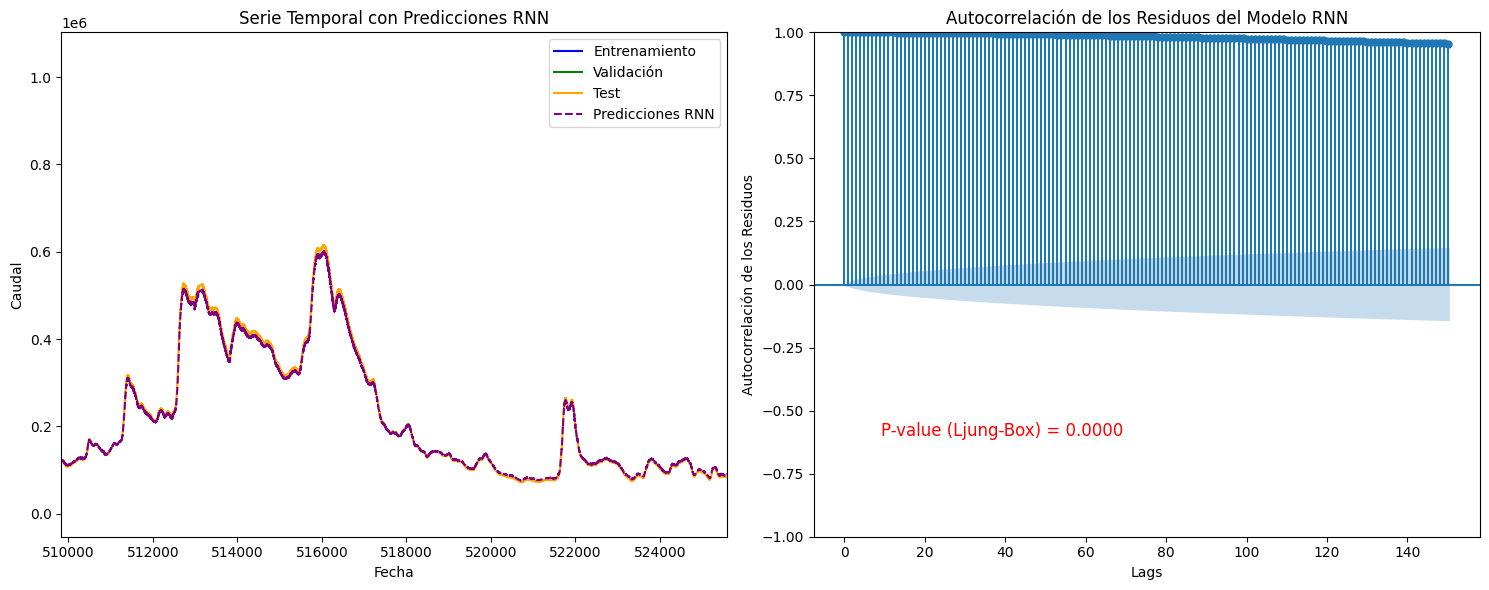

In [ ]:
from tensorflow.keras.layers import Dropout

# Convertir datos a formato adecuado
n_steps = 10  # Tamaño de la ventana

# Crear datos de entrenamiento para RNN
X_train, y_train = [], []
for i in range(len(train_scaled) - n_steps):
    X_train.append(train_scaled[i:i + n_steps])
    y_train.append(train_scaled[i + n_steps])

X_train, y_train = np.array(X_train), np.array(y_train)

# Construcción del modelo RNN con Dropout para evitar sobreajuste
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(n_steps, 1)),
    Dropout(0.2),  # Añadir Dropout para prevenir el sobreajuste
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')

# Entrenamiento
rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predicciones en el conjunto de test
X_test, y_test_real = [], []
for i in range(len(test_scaled) - n_steps):
    X_test.append(test_scaled[i:i + n_steps])
    y_test_real.append(test_scaled[i + n_steps])

X_test, y_test_real = np.array(X_test), np.array(y_test_real)

# Predicciones RNN
rnn_pred = rnn_model.predict(X_test)
rnn_pred = scaler.inverse_transform(rnn_pred)  # Desescalar

# Cálculo de los residuos
residuos_rnn = y_test_real.flatten() - rnn_pred.flatten()

# Figura 18 - Serie Temporal con Predicciones y ACF del Modelo RNN
fig2, axs = plt.subplots(1, 2, figsize=(15, 6))

# Graficar los datos reales de entrenamiento, validación y test
axs[0].plot(train_data.index, train_data['Caudal'], label='Entrenamiento', color='blue')
axs[0].plot(valid_data.index, valid_data['Caudal'], label='Validación', color='green')
axs[0].plot(test_data.index, test_data['Caudal'], label='Test', color='orange')

# Graficar las predicciones del modelo RNN
axs[0].plot(test_data.index[n_steps:], rnn_pred, label='Predicciones RNN', color='purple', linestyle='--')

# Ajustar la visualización para el zoom en el 30% final
zoom_fraction = 0.3
start_index = int(len(test_data) * (1 - zoom_fraction))  # Calcular el índice de inicio del zoom
axs[0].set_xlim(test_data.index[start_index], test_data.index[-1])  # Usar test_data

# Añadir etiquetas y título
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Caudal')
axs[0].set_title('Serie Temporal con Predicciones RNN')
axs[0].legend()

# **Graficar la ACF de los residuos**
plot_acf(residuos_rnn, lags=150, alpha=0.05, ax=axs[1])

axs[1].set_title("Autocorrelación de los Residuos del Modelo RNN")
axs[1].set_xlabel("Lags")
axs[1].set_ylabel("Autocorrelación de los Residuos")

# Calcular el p-value de Ljung-Box y añadirlo al gráfico
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuos_rnn, lags=[10], return_df=True)
p_value_ljung_box = ljung_box_test['lb_pvalue'].iloc[-1]
axs[1].text(0.1, 0.2, f'P-value (Ljung-Box) = {p_value_ljung_box:.4f}',
            transform=axs[1].transAxes, fontsize=12, color='red')

# Ajustar el diseño de la figura
plt.tight_layout()

# Guardar la figura
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_18_Serie_Predicciones_y_ACF_RNN.png')

# Mostrar la figura
plt.show()



In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from math import sqrt

# Calcular las métricas para el modelo RNN
MAPE = mean_absolute_percentage_error(y_test_real, rnn_pred) * 100  # En porcentaje
MAE = mean_absolute_error(y_test_real, rnn_pred)
MSE = mean_squared_error(y_test_real, rnn_pred)
RMSE = sqrt(MSE)

# Prueba de Ljung-Box para los residuos
ljung_box_rnn = acorr_ljungbox(residuos_rnn, lags=[10], return_df=True)
p_value_rnn = ljung_box_rnn['lb_pvalue'].iloc[-1]  # P-value para el último lag

# Crear un DataFrame con las métricas
metrics = {
    'MAPE (%)': [MAPE],
    'MAE': [MAE],
    'RMSE': [RMSE],
    'MSE': [MSE],
    'P-value Ljung-Box': [p_value_rnn]
}

metrics_df = pd.DataFrame(metrics)

# Mostrar las métricas en un DataFrame
print("Métricas del Modelo RNN:")
print(metrics_df)


Métricas del Modelo RNN:
       MAPE (%)            MAE           RMSE           MSE  P-value Ljung-Box
0  1.058817e+08  189264.326556  221323.390433  4.898404e+10                0.0


2.10. LSTM - Long Short-Term Memory

In [ ]:
from tensorflow.keras.layers import LSTM, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Convertir datos a formato adecuado
n_steps = 10  # Tamaño de la ventana

# Crear datos de entrenamiento para LSTM
X_train, y_train = [], []
for i in range(len(train_scaled) - n_steps):
    X_train.append(train_scaled[i:i + n_steps])
    y_train.append(train_scaled[i + n_steps])

X_train, y_train = np.array(X_train), np.array(y_train)

# Construcción del modelo LSTM con Dropout para evitar sobreajuste
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dropout(0.2),  # Añadir Dropout para prevenir el sobreajuste
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Entrenamiento del modelo LSTM
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predicciones en el conjunto de test
X_test, y_test_real = [], []
for i in range(len(test_scaled) - n_steps):
    X_test.append(test_scaled[i:i + n_steps])
    y_test_real.append(test_scaled[i + n_steps])

X_test, y_test_real = np.array(X_test), np.array(y_test_real)

# Predicciones LSTM
lstm_pred = lstm_model.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred)  # Desescalar

# Cálculo de los residuos
residuos_lstm = y_test_real.flatten() - lstm_pred.flatten()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13140/13140 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.0024
Epoch 2/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - loss: 5.6988e-04
Epoch 3/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - loss: 5.6661e-04
Epoch 4/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 5.6511e-04
Epoch 5/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 5.6044e-04
Epoch 6/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 5.6103e-04
Epoch 7/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 5.5937e-04
Epoch 8/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 5.6446e-04
Epoch 9/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 5.4998e-04
Epoch 10/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 5.5727e-04
Epoch 11/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 5.5111e-04
Epoch 12/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 5.4880e-04
Epoch 13/20
13140/13140 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 5.5602e-04
Epoch 14/20
13140/13140

y_test_real shape: (52551, 1)
lstm_pred shape: (52551, 1)
P-Valor de la prueba Dickey-Fuller (LSTM): 0.001403


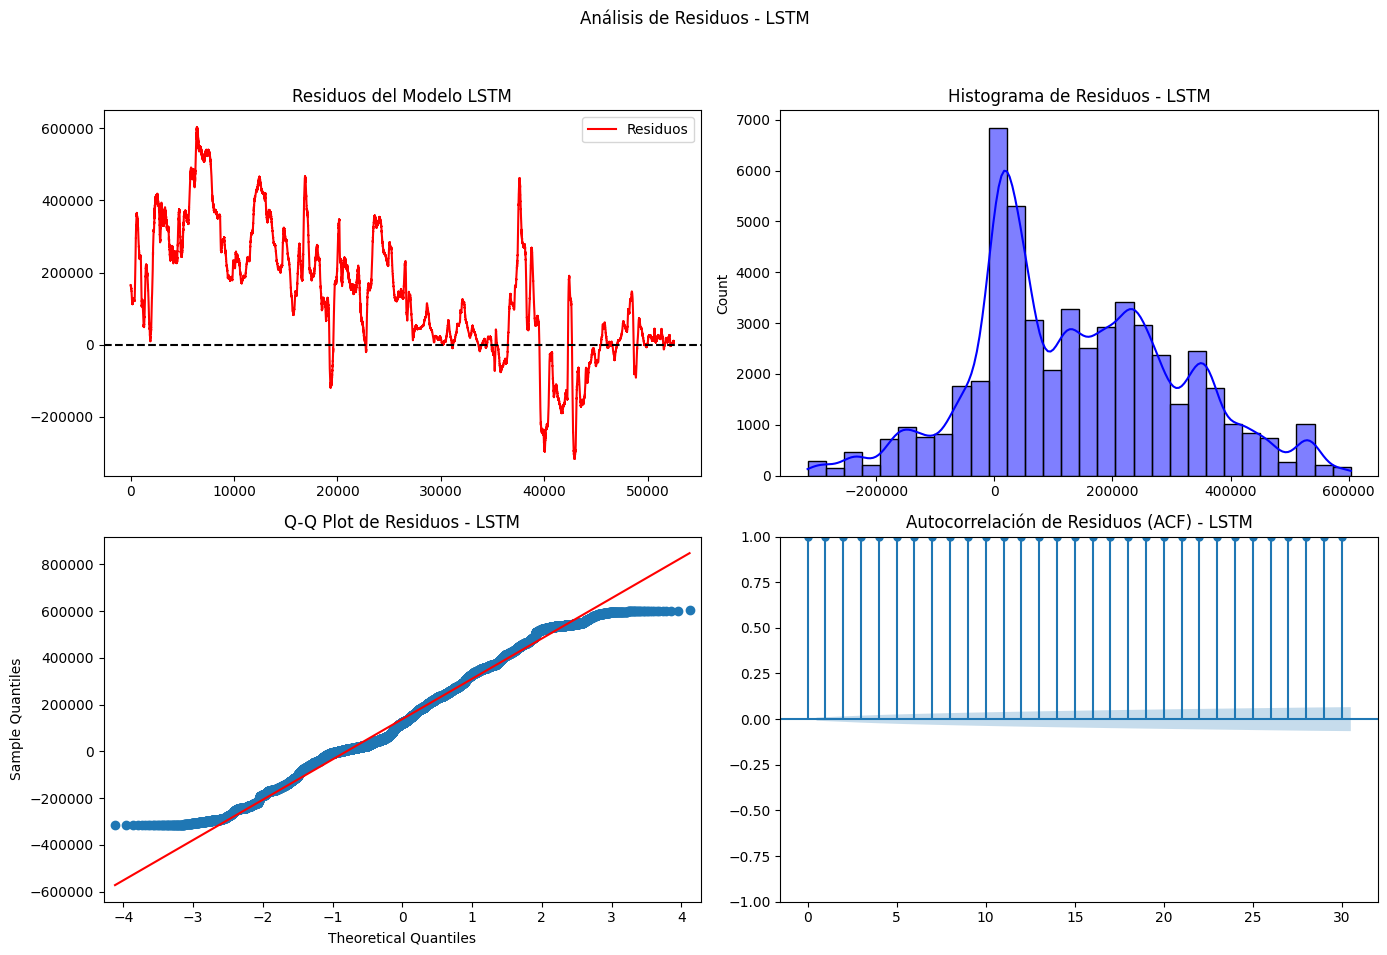

In [ ]:
# Verifica el tamaño de los datos reales y predichos
print(f"y_test_real shape: {y_test_real.shape}")
print(f"lstm_pred shape: {lstm_pred.shape}")

# Si las longitudes son diferentes, recorta las predicciones para que coincidan
# Recortar lstm_pred si es necesario (dependiendo de cuál es más largo)
min_length = min(len(y_test_real), len(lstm_pred))
y_test_real = y_test_real[:min_length]
lstm_pred = lstm_pred[:min_length]

# Cálculo de los residuos (ahora deberían tener el mismo tamaño)
residuos_lstm = y_test_real.flatten() - lstm_pred.flatten()

# Prueba de Dickey-Fuller para LSTM
adf_lstm = adfuller(residuos_lstm)
p_valor_lstm = adf_lstm[1]
print(f"P-Valor de la prueba Dickey-Fuller (LSTM): {p_valor_lstm:.6f}")

# Crear figura con 2x2 subgráficos para LSTM
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Análisis de Residuos - LSTM")

# **Gráfica de los residuos del entrenamiento** (Fila 1, Columna 1)
axs[0, 0].plot(residuos_lstm, label="Residuos", color="red")
axs[0, 0].axhline(y=0, linestyle="dashed", color="black")
axs[0, 0].set_title("Residuos del Modelo LSTM")
axs[0, 0].legend()

# **Histograma de los residuos del entrenamiento** (Fila 1, Columna 2)
sns.histplot(residuos_lstm, kde=True, bins=30, color="blue", ax=axs[0, 1])
axs[0, 1].set_title("Histograma de Residuos - LSTM")

# **Q-Q Plot de los residuos** (Fila 2, Columna 1)
sm.qqplot(residuos_lstm, line="s", ax=axs[1, 0])
axs[1, 0].set_title("Q-Q Plot de Residuos - LSTM")

# **ACF de los residuos** (Fila 2, Columna 2)
plot_acf(residuos_lstm, lags=30, ax=axs[1, 1])
axs[1, 1].set_title("Autocorrelación de Residuos (ACF) - LSTM")

# Ajustar el diseño de la figura
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar para que el título no se sobreponga

# Mostrar la figura
plt.show()

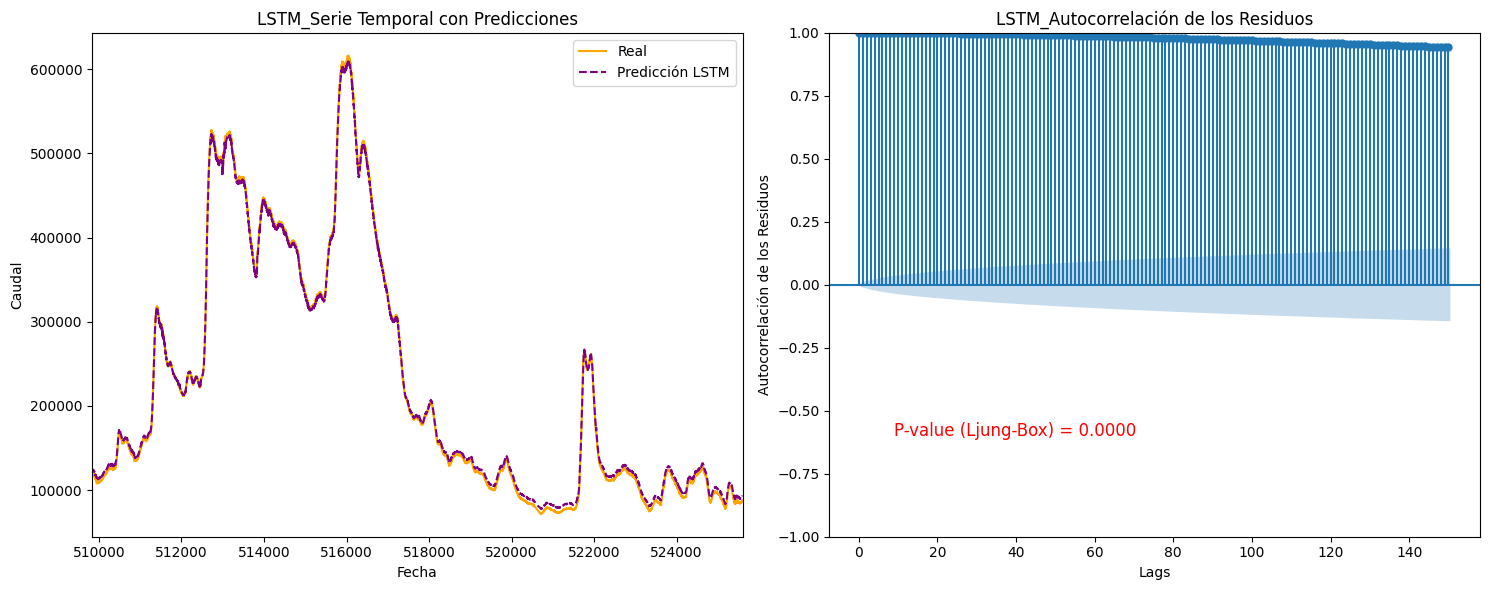

In [ ]:
# Figura 20 - Serie Temporal con Predicciones y ACF del Modelo LSTM
fig2, axs = plt.subplots(1, 2, figsize=(15, 6))

# Graficar los datos reales de test y las predicciones
axs[0].plot(test_data.index, test_data['Caudal'], label='Real', color='orange')
axs[0].plot(test_data.index[n_steps:], lstm_pred, label='Predicción LSTM', linestyle='dashed', color='purple')

# Ajustar la visualización para el zoom en el 30% final
zoom_fraction = 0.3
start_index = int(len(test_data) * (1 - zoom_fraction))  # Calcular el índice de inicio del zoom
axs[0].set_xlim(test_data.index[start_index], test_data.index[-1])  # Usar test_data

# Añadir etiquetas y título
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Caudal')
axs[0].set_title('LSTM_Serie Temporal con Predicciones')
axs[0].legend()

# **Graficar la ACF de los residuos**
plot_acf(residuos_lstm, lags=150, alpha=0.05, ax=axs[1])

axs[1].set_title("LSTM_Autocorrelación de los Residuos")
axs[1].set_xlabel("Lags")
axs[1].set_ylabel("Autocorrelación de los Residuos")

# Calcular el p-value de Ljung-Box y añadirlo al gráfico
ljung_box_test = acorr_ljungbox(residuos_lstm, lags=[10], return_df=True)
p_value_ljung_box = ljung_box_test['lb_pvalue'].iloc[-1]
axs[1].text(0.1, 0.2, f'P-value (Ljung-Box) = {p_value_ljung_box:.4f}',
            transform=axs[1].transAxes, fontsize=12, color='red')

# Ajustar el diseño de la figura
plt.tight_layout()

# Guardar la figura
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_20_Serie_Predicciones_y_ACF_LSTM.png')

# Mostrar la figura
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

# Calcular las métricas para el modelo LSTM

# Error cuadrático medio (RMSE)
rmse_lstm = np.sqrt(mean_squared_error(y_test_real, lstm_pred))

# Error absoluto medio (MAE)
mae_lstm = mean_absolute_error(y_test_real, lstm_pred)

# Error cuadrático medio (MSE)
mse_lstm = mean_squared_error(y_test_real, lstm_pred)

# MAPE (Mean Absolute Percentage Error)
mape_lstm = np.mean(np.abs((y_test_real.flatten() - lstm_pred.flatten()) / y_test_real.flatten())) * 100

# P-value de Ljung-Box
ljung_box_test = acorr_ljungbox(residuos_lstm, lags=[10], return_df=True)
p_value_ljung_box = ljung_box_test['lb_pvalue'].iloc[-1]

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame({
    'MAPE (%)': [mape_lstm],
    'MAE': [mae_lstm],
    'RMSE': [rmse_lstm],
    'MSE': [mse_lstm],
    'P-value Ljung-Box': [p_value_ljung_box]
})

# Mostrar las métricas
print(metrics_df)


       MAPE (%)            MAE           RMSE           MSE  P-value Ljung-Box
0  1.077883e+08  192480.733197  224949.507123  5.060228e+10                0.0


2.11. CGAN + Bi-LSTM


Modelo propuesto: Modelo híbrido entre CGAN- Conditional Generative Adversarial Network y Bi-LSTM - Bidirectional Long Short-Term Memory

In [ ]:
!pip install tensorflow keras tqdm

In [ ]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox  # Esta es la corrección para el import


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Modelado_Misisipi/Datos_Caudal_Mssp.csv')


# Normalizar Caudal (MinMaxScaler)
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalizar la columna Caudal
df['Caudal_norm'] = scaler.fit_transform(df[['Caudal']])

# Verificar las primeras filas de los datos
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,datetime,Caudal,Caudal_norm
0,3/02/1995 14:00,211500.0,0.201429
1,3/02/1995 14:30,211250.0,0.201190
2,3/02/1995 15:00,211000.0,0.200952
3,3/02/1995 15:30,211250.0,0.201190
4,3/02/1995 16:00,211500.0,0.201429


In [ ]:
# Crear el generador para CGAN
def build_generator(latent_dim, input_dim):
    model = Sequential([
        Dense(64, activation="relu", input_dim=latent_dim + input_dim),
        Dense(128, activation="relu"),
        Dense(256, activation="relu"),
        Dense(1, activation="linear")  # Salida en el mismo rango que el caudal normalizado
    ])
    return model

# Crear el discriminador para CGAN
def build_discriminator(input_dim):
    model = Sequential([
        Dense(256, activation="relu", input_dim=input_dim),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid")  # Salida entre 0 y 1
    ])
    return model


In [ ]:
# Construir el modelo CGAN
def build_cgan(generator, discriminator, latent_dim, input_dim):
    discriminator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

    noise = tf.keras.Input(shape=(latent_dim,))
    conditions = tf.keras.Input(shape=(input_dim,))

    gen_input = tf.keras.layers.Concatenate()([noise, conditions])
    generated_data = generator(gen_input)

    discriminator.trainable = False  # No entrenamos el discriminador aquí
    validity = discriminator(tf.keras.layers.Concatenate()([generated_data, conditions]))

    cgan = tf.keras.Model([noise, conditions], validity)
    cgan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

    return cgan

latent_dim = 10  # Dimensión del ruido aleatorio
input_dim = 1  # Solo la variable "Caudal_norm"
epochs = 5000
batch_size = 64

generator = build_generator(latent_dim, input_dim)
discriminator = build_discriminator(input_dim + 1)  # Condición + dato
cgan = build_cgan(generator, discriminator, latent_dim, input_dim)

real_data = df['Caudal_norm'].values.reshape(-1, 1)
conditions = np.random.rand(len(real_data), input_dim)  # Generamos condiciones aleatorias

# Entrenar CGAN
for epoch in tqdm(range(epochs)):
    # Seleccionar batch aleatorio de datos reales
    idx = np.random.randint(0, real_data.shape[0], batch_size)
    real_samples = real_data[idx]
    real_conditions = conditions[idx]

    # Generar datos sintéticos
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_samples = generator.predict(np.hstack((noise, real_conditions)), verbose=0)

    # Entrenar el discriminador
    d_loss_real = discriminator.train_on_batch(np.hstack((real_samples, real_conditions)), np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(np.hstack((gen_samples, real_conditions)), np.zeros((batch_size, 1)))

    # Entrenar el generador
    g_loss = cgan.train_on_batch([noise, real_conditions], np.ones((batch_size, 1)))

    # Imprimir progreso cada 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} | D Loss: {d_loss_real[0] + d_loss_fake[0]} | G Loss: {g_loss}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
  0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")
  0%|          | 2/5000 [00:05<3:12:14,  2.31s/it]

Epoch 0 | D Loss: 1.3674814701080322 | G Loss: 0.6826943159103394


 20%|██        | 1003/5000 [01:59<04:56, 13.49it/s]

Epoch 1000 | D Loss: 7.368335723876953 | G Loss: 0.05338320508599281


 40%|████      | 2002/5000 [03:15<03:26, 14.52it/s]

Epoch 2000 | D Loss: 9.60471248626709 | G Loss: 0.026758743450045586


 60%|██████    | 3003/5000 [04:33<02:22, 14.06it/s]

Epoch 3000 | D Loss: 11.050256729125977 | G Loss: 0.017849605530500412


 80%|████████  | 4002/5000 [05:52<01:05, 15.13it/s]

Epoch 4000 | D Loss: 12.13650131225586 | G Loss: 0.013390392996370792


100%|██████████| 5000/5000 [07:07<00:00, 11.69it/s]


In [ ]:
# Crear secuencias para la LSTM
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(df['Caudal_norm'].values, time_steps)

# División en entrenamiento y prueba (80/20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# Construir el modelo Bi-LSTM
model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True, input_shape=(time_steps, 1))),
    Dropout(0.2),
    Bidirectional(LSTM(50)),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")

# Asegurar que los datos tienen la forma correcta
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Entrenar el modelo Bi-LSTM
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/20
3285/3285 ━━━━━━━━━━━━━━━━━━━━ 47s 13ms/step - loss: 7.4823e-04 - val_loss: 7.3184e-06
Epoch 2/20
3285/3285 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - loss: 7.6793e-05 - val_loss: 1.1202e-05
Epoch 3/20
3285/3285 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - loss: 7.2383e-05 - val_loss: 3.0270e-05
Epoch 4/20
3285/3285 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - loss: 7.0165e-05 - val_loss: 8.3661e-06
Epoch 5/20
3285/3285 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - loss: 6.8405e-05 - val_loss: 4.1925e-06
Epoch 6/20
3285/3285 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 6.8407e-05 - val_loss: 5.2555e-06
Epoch 7/20
3285/3285 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - loss: 6.7350e-05 - val_loss: 5.0750e-06
Epoch 8/20
3285/3285 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - loss: 6.7634e-05 - val_loss: 1.4650e-05
Epoch 9/20
3285/3285 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - loss: 6.7546e-05 - val_loss: 8.4518e-06
Epoch 10/20
3285/3285 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - loss: 6.8497e-05 - val_loss: 2.9536e-06
Epoch 11/20
3285/32

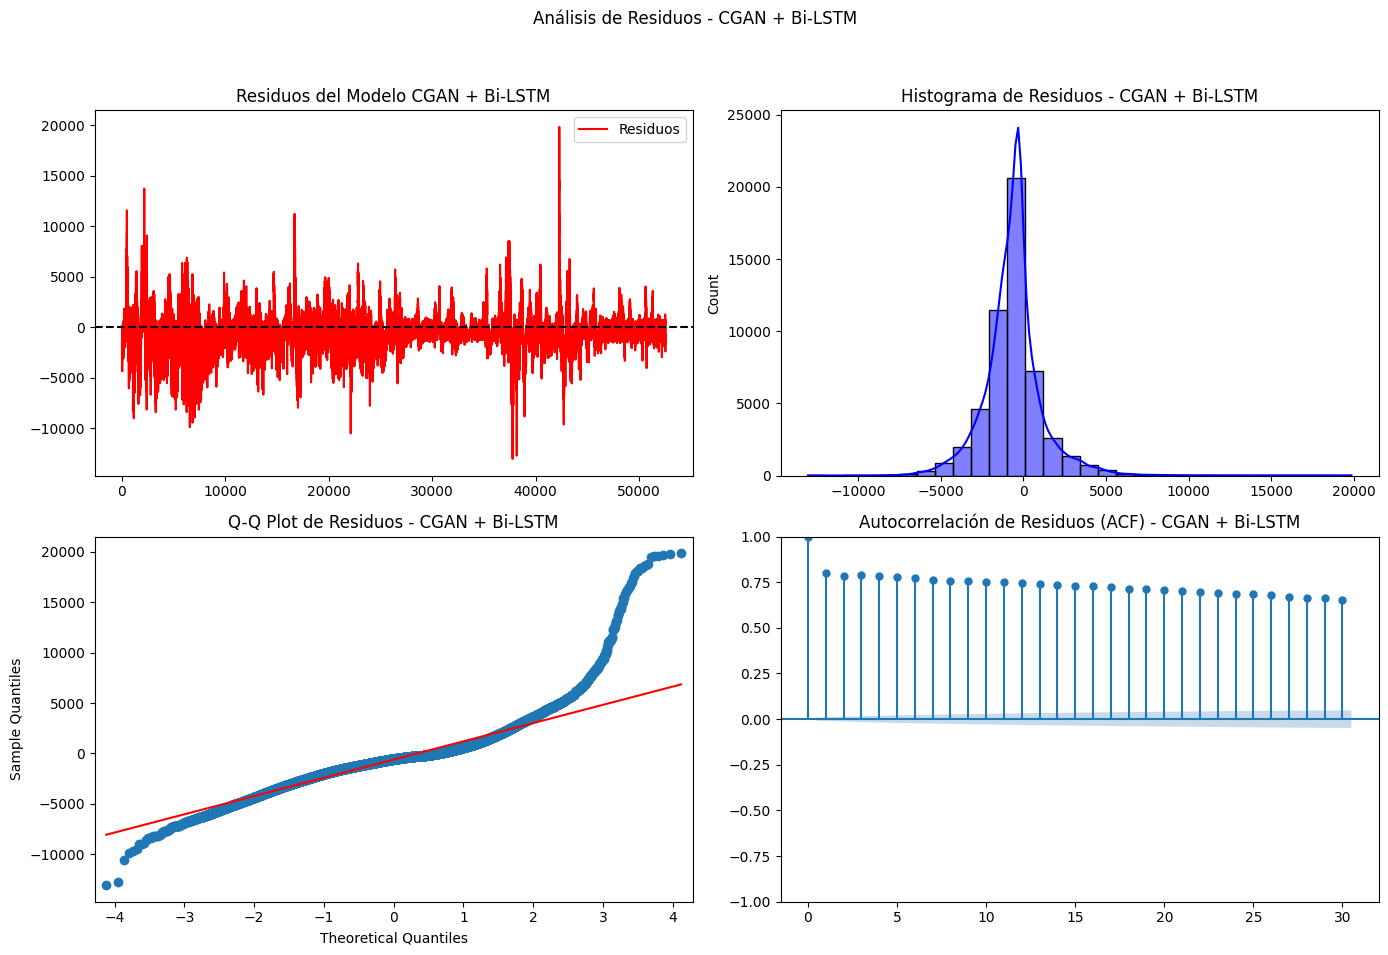

In [ ]:
# Cálculo de los residuos para CGAN + Bi-LSTM
# Asegurémonos de que las predicciones y los valores reales tengan la misma longitud
y_pred_real = y_pred_real[:len(y_test_real)]  # Ajustamos las predicciones para que coincidan con el tamaño de y_test_real

# Calcular los residuos
residuos_cgan_bilstm = y_test_real.flatten() - y_pred_real.flatten()

# Crear figura con 2x2 subgráficos para CGAN + Bi-LSTM
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Análisis de Residuos - CGAN + Bi-LSTM")

# **Gráfica de los residuos del entrenamiento** (Fila 1, Columna 1)
axs[0, 0].plot(residuos_cgan_bilstm, label="Residuos", color="red")
axs[0, 0].axhline(y=0, linestyle="dashed", color="black")
axs[0, 0].set_title("Residuos del Modelo CGAN + Bi-LSTM")
axs[0, 0].legend()

# **Histograma de los residuos del entrenamiento** (Fila 1, Columna 2)
sns.histplot(residuos_cgan_bilstm, kde=True, bins=30, color="blue", ax=axs[0, 1])
axs[0, 1].set_title("Histograma de Residuos - CGAN + Bi-LSTM")

# **Q-Q Plot de los residuos** (Fila 2, Columna 1)
sm.qqplot(residuos_cgan_bilstm, line="s", ax=axs[1, 0])
axs[1, 0].set_title("Q-Q Plot de Residuos - CGAN + Bi-LSTM")

# **ACF de los residuos** (Fila 2, Columna 2)
plot_acf(residuos_cgan_bilstm, lags=30, ax=axs[1, 1])
axs[1, 1].set_title("Autocorrelación de Residuos (ACF) - CGAN + Bi-LSTM")

# Ajustar el diseño de la figura
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar para que el título no se sobreponga

# Guardar la figura
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_21_Análisis_Residuos_CGAN_Bi_LSTM.png')

# Mostrar la figura
plt.show()



3285/3285 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step


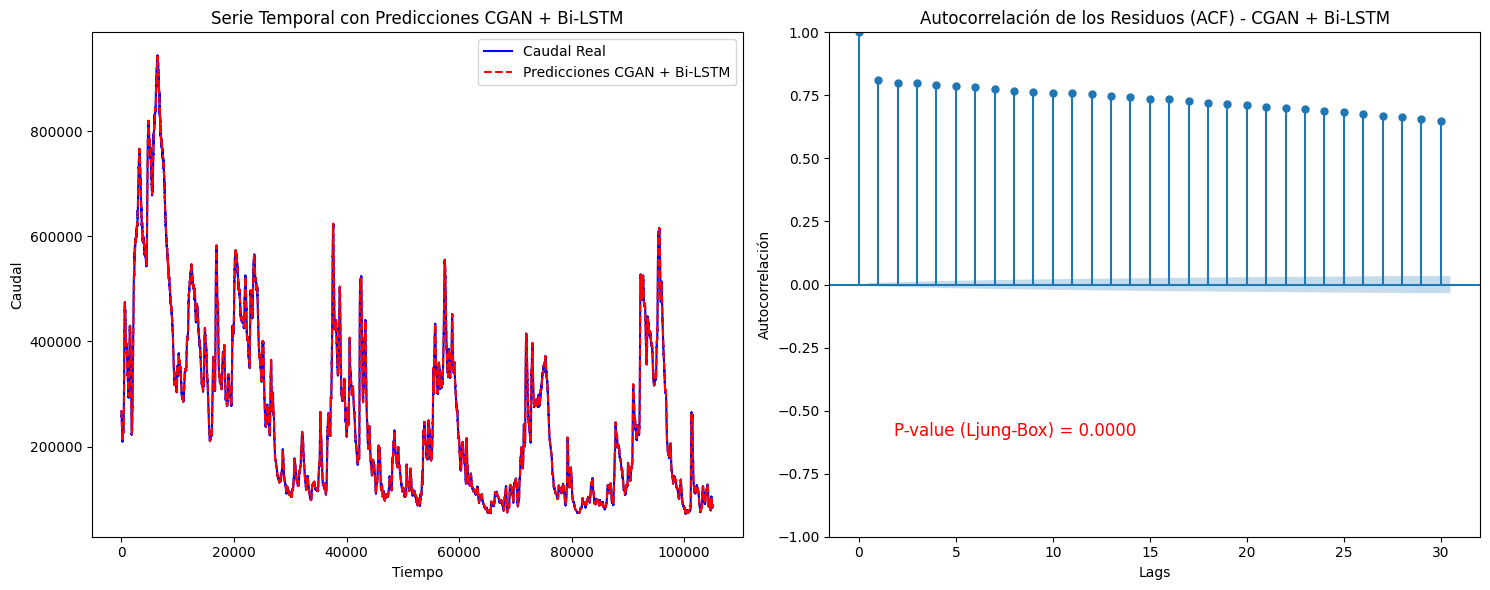

In [ ]:
# Hacer las predicciones del modelo CGAN + Bi-LSTM
y_pred_cgan_bilstm = model.predict(X_test)

# Desescalar los datos predichos y reales
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))  # Asegurarse de que y_test está correctamente desescalado
y_pred_real = scaler.inverse_transform(y_pred_cgan_bilstm)

# Calcular los residuos
residuos_cgan_bilstm = y_test_real.flatten() - y_pred_real.flatten()

#  Crear la figura con 1x2 subgráficos
fig2, axs = plt.subplots(1, 2, figsize=(15, 6))

# **Gráfica de la Serie Temporal con Predicciones** (Primer gráfico)
axs[0].plot(y_test_real, label="Caudal Real", color="blue")
axs[0].plot(y_pred_real, label="Predicciones CGAN + Bi-LSTM", color="red", linestyle="dashed")
axs[0].set_title("Serie Temporal con Predicciones CGAN + Bi-LSTM")
axs[0].set_xlabel("Tiempo")
axs[0].set_ylabel("Caudal")
axs[0].legend()

# **ACF de los residuos del modelo** (Segundo gráfico)
plot_acf(residuos_cgan_bilstm, lags=30, alpha=0.05, ax=axs[1])
axs[1].set_title("Autocorrelación de los Residuos (ACF) - CGAN + Bi-LSTM")
axs[1].set_xlabel("Lags")
axs[1].set_ylabel("Autocorrelación")

# Calcular el p-value de Ljung-Box y añadirlo al gráfico
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuos_cgan_bilstm, lags=[10], return_df=True)
p_value_ljung_box = ljung_box_test['lb_pvalue'].iloc[-1]
axs[1].text(0.1, 0.2, f'P-value (Ljung-Box) = {p_value_ljung_box:.4f}',
            transform=axs[1].transAxes, fontsize=12, color='red')

# Ajustar el diseño de la figura
plt.tight_layout()

# Guardar la figura
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_22_Serie_Predicciones_y_ACF_CGAN_Bi_LSTM.png')

# Mostrar la figura
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 95s 7ms/step - loss: 8.7491e-04 - val_loss: 1.6200e-05
Epoch 2/100
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 65s 6ms/step - loss: 3.0663e-04 - val_loss: 2.1733e-05
Epoch 3/100
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 75s 7ms/step - loss: 2.8398e-04 - val_loss: 3.9436e-05
Epoch 4/100
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 70s 7ms/step - loss: 2.7306e-04 - val_loss: 9.1544e-05
Epoch 5/100
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 81s 7ms/step - loss: 2.6666e-04 - val_loss: 4.1754e-05
Epoch 6/100
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 67s 6ms/step - loss: 2.4514e-04 - val_loss: 3.5722e-05
Epoch 7/100
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 75s 7ms/step - loss: 2.3517e-04 - val_loss: 5.2555e-05
Epoch 8/100
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 68s 7ms/step - loss: 2.2492e-04 - val_loss: 9.5321e-05
Epoch 9/100
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 79s 6ms/step - loss: 2.1827e-04 - val_loss: 1.1988e-04
Epoch 10/100
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 90s 7ms/step - loss: 2.1896e-04 - val_loss: 1.6873e-04

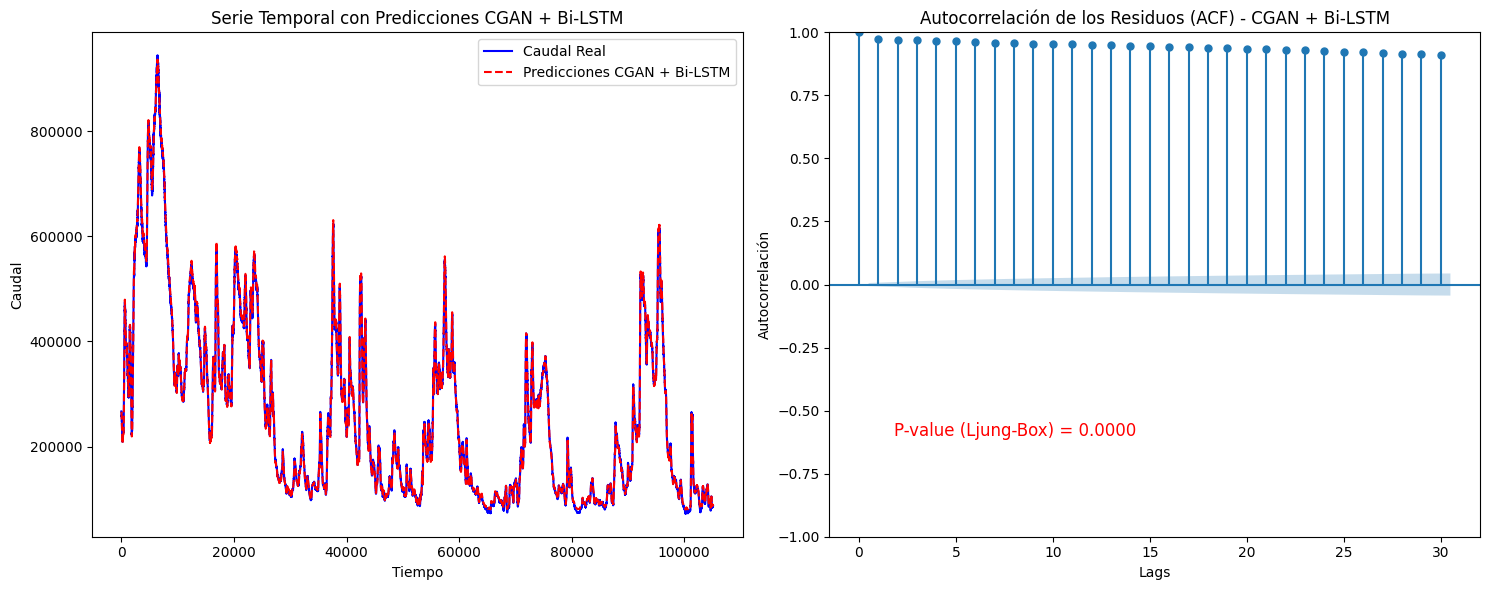

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Convertir datos a formato adecuado
n_steps = 10  # Tamaño de la ventana

# Crear datos de entrenamiento para CGAN + Bi-LSTM
X_train, y_train = [], []
for i in range(len(train_scaled) - n_steps):
    X_train.append(train_scaled[i:i + n_steps])
    y_train.append(train_scaled[i + n_steps])

X_train, y_train = np.array(X_train), np.array(y_train)

# **Definir el modelo CGAN + Bi-LSTM con Dropout y EarlyStopping para evitar sobreajuste**
model_cgan_bilstm = Sequential([
    Bidirectional(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1))),
    Dropout(0.3),  # Dropout más alto
    Bidirectional(LSTM(50, activation='relu')),
    Dropout(0.3),  # Otro Dropout
    Dense(1)
])

model_cgan_bilstm.compile(optimizer='adam', loss='mse')

# **EarlyStopping: detener entrenamiento si la validación no mejora**
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenamiento del modelo con EarlyStopping
history = model_cgan_bilstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                                validation_split=0.2, callbacks=[early_stopping])

# Predicciones
y_pred_cgan_bilstm = model_cgan_bilstm.predict(X_test)

# Desescalar las predicciones
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = scaler.inverse_transform(y_pred_cgan_bilstm)

# Calcular los residuos
residuos_cgan_bilstm = y_test_real.flatten() - y_pred_real.flatten()

# Crear la figura con 1x2 subgráficos para la Figura 22
fig2, axs = plt.subplots(1, 2, figsize=(15, 6))

# **Gráfica de la Serie Temporal con Predicciones** (Primer gráfico)
axs[0].plot(y_test_real, label="Caudal Real", color="blue")
axs[0].plot(y_pred_real, label="Predicciones CGAN + Bi-LSTM", color="red", linestyle="dashed")
axs[0].set_title("Serie Temporal con Predicciones CGAN + Bi-LSTM")
axs[0].set_xlabel("Tiempo")
axs[0].set_ylabel("Caudal")
axs[0].legend()

# **ACF de los residuos del modelo** (Segundo gráfico)
plot_acf(residuos_cgan_bilstm, lags=30, alpha=0.05, ax=axs[1])
axs[1].set_title("Autocorrelación de los Residuos (ACF) - CGAN + Bi-LSTM")
axs[1].set_xlabel("Lags")
axs[1].set_ylabel("Autocorrelación")

# Calcular el p-value de Ljung-Box y añadirlo al gráfico
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuos_cgan_bilstm, lags=[10], return_df=True)
p_value_ljung_box = ljung_box_test['lb_pvalue'].iloc[-1]
axs[1].text(0.1, 0.2, f'P-value (Ljung-Box) = {p_value_ljung_box:.4f}',
            transform=axs[1].transAxes, fontsize=12, color='red')

# Ajustar el diseño de la figura
plt.tight_layout()

# Guardar la figura
plt.savefig('/content/drive/MyDrive/Modelado_Misisipi/Figura_22_Serie_Predicciones_y_ACF_CGAN_Bi_LSTM.png')

# Mostrar la figura
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.diagnostic import acorr_ljungbox

# Asume que 'y_pred_cgan_bilstm' son las predicciones del modelo CGAN + Bi-LSTM
# y 'y_test' son los valores reales correspondientes (debe estar desescalado)

# Desescalar los valores reales y las predicciones
y_test_real = scaler.inverse_transform(y_test.flatten().reshape(-1, 1))  # Valores reales desescalados
y_pred_real = scaler.inverse_transform(y_pred_cgan_bilstm.flatten().reshape(-1, 1))  # Predicciones desescaladas

# Calcular MAPE (Mean Absolute Percentage Error)
mape_cgan_bilstm = np.mean(np.abs((y_test_real - y_pred_real) / y_test_real)) * 100

# Calcular MAE (Mean Absolute Error)
mae_cgan_bilstm = mean_absolute_error(y_test_real, y_pred_real)

# Calcular RMSE (Root Mean Squared Error)
rmse_cgan_bilstm = np.sqrt(mean_squared_error(y_test_real, y_pred_real))

# Calcular MSE (Mean Squared Error)
mse_cgan_bilstm = mean_squared_error(y_test_real, y_pred_real)

# Cálculo de los residuos
residuos_cgan_bilstm = y_test_real.flatten() - y_pred_real.flatten()

# Realizar la prueba de Ljung-Box para los residuos
ljung_box_test = acorr_ljungbox(residuos_cgan_bilstm, lags=[10], return_df=True)
p_value_ljung_box = ljung_box_test['lb_pvalue'].iloc[-1]  # P-value para el lag 10

# Crear un DataFrame con las métricas del modelo CGAN + Bi-LSTM
metrics_dict = {
    'Modelo': ['CGAN + Bi-LSTM'],
    'MAPE (%)': [mape_cgan_bilstm],
    'MAE': [mae_cgan_bilstm],
    'RMSE': [rmse_cgan_bilstm],
    'MSE': [mse_cgan_bilstm],
    'P-value Ljung-Box': [p_value_ljung_box]
}

metrics_df = pd.DataFrame(metrics_dict)

# Mostrar el DataFrame con las métricas
print(metrics_df)

# Opcional: Guardar el DataFrame como un archivo CSV
metrics_df.to_csv('/content/drive/MyDrive/Modelado_Misisipi/Metrics_CGAN_Bi_LSTM.csv', index=False)



           Modelo  MAPE (%)          MAE         RMSE           MSE  \
0  CGAN + Bi-LSTM  1.509486  3103.950754  4051.280121  1.641287e+07   

   P-value Ljung-Box  
0                0.0  
